In [1]:
import pandas as pd
import numpy as np
import wget
from os import listdir, remove, stat, mkdir
import os.path
import requests
import zipfile
import xml.etree.cElementTree as et


pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
def convert_bytes(num):
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0

def file_size(file_path):
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)
    
def unzip_all(filename,temp_dir):
    with zipfile.ZipFile(filename,"r") as zip_ref:
        zip_ref.extractall(download_folder+temp_dir)
        
def unzip_file(file,filename,temp_dir):
    with zipfile.ZipFile(filename,"r") as zip_ref:
        zip_ref.extract(file,download_folder+temp_dir)
        
def unzip_list(filename):
    with zipfile.ZipFile(filename,"r") as zip_ref:
        return zip_ref.namelist()
    
def read_xml(file):
    root = et.parse(file).getroot()
    d  = dict()
    for count,elem in enumerate(root):
        d[count] = elem.attrib
    return pd.DataFrame.from_dict(d, orient='index')

In [3]:
download_folder = 'd:\\publicidade_oficial\\download\\'
data_folder = 'd:\\publicidade_oficial\\data\\'

## Data from TSE

In [250]:
for year in [2008,2012,2016]:
    df = pd.DataFrame([])
    filename = 'consulta_'+str(year)+'.zip'
    if filename not in listdir(download_folder):
        wget.download('http://agencia.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_'+str(year)+'.zip', download_folder + filename)
    print(filename,file_size(download_folder+filename))
    temp_dir = filename.split('.')[0]
    unzip_all(download_folder+filename,temp_dir)
    files = [download_folder+temp_dir+'\\'+x for x in listdir(download_folder+temp_dir) if x.split('.')[-1] != 'pdf']
    if year < 2016:
        names = ['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NR_TURNO', 'DS_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NM_CANDIDATO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_URNA_CANDIDATO', 'CD_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'CODIGO_LEGENDA', 'SIGLA_LEGENDA', 'DS_COMPOSICAO_COLIGACAO', 'NM_COLIGACAO', 'CD_OCUPACAO', 'DS_OCUPACAO', 'DT_NASCIMENTO', 'NR_TITULO_ELEITORAL_CANDIDATO', 'NR_IDADE_DATA_POSSE', 'CD_GENERO', 'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'NR_DESPESA_MAX_CAMPANHA', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO']
        if year == 2012:
            names = names + ['NM_EMAIL']
        for f in files:
            df_uf = pd.read_csv(f, sep=';', encoding = "ISO-8859-1", names=names)
            df = df.append(df_uf, sort=False, ignore_index=True)
    else:
        for f in files:
            df_uf = pd.read_csv(f, sep=';', encoding = "ISO-8859-1")
            df = df.append(df_uf, sort=False)
    df = df[(df['DS_CARGO'] == 'PREFEITO') | (df['DS_CARGO'] == 'VICE-PREFEITO')]
    display(df.head())
    df.to_pickle(data_folder+'candidato_'+str(year)+'.pickle')

2008
consulta_2008.zip 23.6 MB


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NM_CANDIDATO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,NM_URNA_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CODIGO_LEGENDA,SIGLA_LEGENDA,DS_COMPOSICAO_COLIGACAO,NM_COLIGACAO,CD_OCUPACAO,DS_OCUPACAO,DT_NASCIMENTO,NR_TITULO_ELEITORAL_CANDIDATO,NR_IDADE_DATA_POSSE,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,26/04/2018,19:31:19,2008,1,Eleições 2008,AC,1120,ACRELÂNDIA,11,PREFEITO,CARLOS CÉSAR NUNES DE ARAÚJO,667,40,73900443220,CARLINHOS,2,DEFERIDO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,76,#NE#,#NE#,'UNIDOS VENCEREMOS',278,VEREADOR,17/07/1984,3851432453,-1,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRASILEIRA NATA,AC,-1,PLÁCIDO DE CASTRO,-1,4,NÃO ELEITO
1,26/04/2018,19:31:19,2008,1,Eleições 2008,AC,1120,ACRELÂNDIA,11,PREFEITO,JOSÉ DONISETE DE MELO,801,15,39642232120,PROFESSOR DONISETE,2,DEFERIDO,15,PMDB,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,90,#NE#,#NE#,TODOS PELA MUNDANÇA,265,PROFESSOR DE ENSINO FUNDAMENTAL,13/07/1967,2803292410,-1,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRASILEIRA NATA,MS,-1,DOURADOS,-1,4,NÃO ELEITO
2,26/04/2018,19:31:19,2008,1,Eleições 2008,AC,1120,ACRELÂNDIA,11,PREFEITO,VILSEU FERREIRA DA SILVA,637,11,27278913187,VILSEU FERREIRA,2,DEFERIDO,11,PP,PARTIDO PROGRESSISTA,71,#NE#,#NE#,FRENTE POPULAR DE ACRELANDIA - FPA,275,PREFEITO,18/04/1960,411782470,-1,2,MASCULINO,5,ENSINO MÉDIO INCOMPLETO,3,CASADO(A),1,BRASILEIRA NATA,PR,-1,PEROLA DO OESTE,-1,1,ELEITO
3,26/04/2018,19:31:19,2008,1,Eleições 2008,AC,1120,ACRELÂNDIA,12,VICE-PREFEITO,CESALPINO FARIA DE ARAUJO,638,11,77722914772,PININHO,2,DEFERIDO,13,PT,PARTIDO DOS TRABALHADORES,71,#NE#,#NE#,FRENTE POPULAR DE ACRELANDIA - FPA,601,AGRICULTOR,03/05/1959,2158792453,-1,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,3,CASADO(A),1,BRASILEIRA NATA,ES,-1,BARRA DE SAO FRANCISCO,-1,-1,#NULO#
4,26/04/2018,19:31:19,2008,1,Eleições 2008,AC,1120,ACRELÂNDIA,12,VICE-PREFEITO,CLOVIS VALDIR MORETI,668,40,45848106134,CLOVIS,2,DEFERIDO,33,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,76,#NE#,#NE#,'UNIDOS VENCEREMOS',602,PECUARISTA,11/04/1968,3550702429,-1,2,MASCULINO,2,LÊ E ESCREVE,3,CASADO(A),1,BRASILEIRA NATA,PR,-1,LARANJEIRAS DO SUL,-1,-1,#NULO#


2012
consulta_2012.zip 32.9 MB


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NM_CANDIDATO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,NM_URNA_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CODIGO_LEGENDA,SIGLA_LEGENDA,DS_COMPOSICAO_COLIGACAO,NM_COLIGACAO,CD_OCUPACAO,DS_OCUPACAO,DT_NASCIMENTO,NR_TITULO_ELEITORAL_CANDIDATO,NR_IDADE_DATA_POSSE,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,NM_EMAIL
8,15/07/2016,19:21:07,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1015,CAPIXABA,12,VICE-PREFEITO,RUBENS ALVES DA SILVA,10000002537,33,1540734234,ZÉ DO CÔCO,2,DEFERIDO,25,DEM,DEMOCRATAS,10000000206,#NE#,DEM / PMN,"PODEMOS MUDAR, MAS PRECISAMOS DE VOCÊ",601,AGRICULTOR,22/02/1941,372362461,-1,2,MASCULINO,3,ENSINO FUNDAMENTAL INCOMPLETO,7,SEPARADO(A) JUDICIALMENTE,1,BRASILEIRA NATA,AC,-1,XAPURI,-1.0,4,NÃO ELEITO,#NULO#
9,15/07/2016,19:21:07,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1015,CAPIXABA,11,PREFEITO,FRANCISCA LEIDA ARAUJO DA COSTA,10000002536,33,22064834249,LEIDA,2,DEFERIDO,33,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,10000000206,#NE#,DEM / PMN,"PODEMOS MUDAR, MAS PRECISAMOS DE VOCÊ",169,COMERCIANTE,10/12/1961,693592461,-1,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRASILEIRA NATA,AC,-1,RIO BRANCO,300000.0,4,NÃO ELEITO,LEIIDAARAUJO@YAHOO.COM.BR
28,15/07/2016,19:21:07,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1139,FEIJÓ,12,VICE-PREFEITO,ABNER TAVARES DOS SANTOS,10000000440,11,36014095268,ABNER,2,DEFERIDO,15,PMDB,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,10000000051,#NE#,PP / PMDB,RENOVA FEIJO,257,EMPRESÁRIO,11/04/1972,1812342437,-1,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),1,BRASILEIRA NATA,AC,-1,FEIJO,-1.0,4,NÃO ELEITO,AUDIOTROM@GMAIL.COM
29,15/07/2016,19:21:07,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1139,FEIJÓ,11,PREFEITO,KIEFER ROBERTO CAVALCANTE LIMA,10000000439,11,30870968220,KIEFER,2,DEFERIDO,11,PP,PARTIDO PROGRESSISTA,10000000051,#NE#,PP / PMDB,RENOVA FEIJO,257,EMPRESÁRIO,16/09/1968,1555542453,-1,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRASILEIRA NATA,AC,-1,FEIJO,500000.0,4,NÃO ELEITO,KIEFERLIMA11@HOTMAIL.COM
50,15/07/2016,19:21:07,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1023,PORTO ACRE,12,VICE-PREFEITO,RAIMUNDO JERONIMO DOS ANJOS CHAVES,10000000008,13,12896535268,COCA,2,DEFERIDO,65,PC do B,PARTIDO COMUNISTA DO BRASIL,10000000004,#NE#,PRB / PDT / PT / PTN / PSDC / PMN / PSB / PC do B,FRENTE POPULAR DE PORTO ACRE-FPPA,298,SERVIDOR PÚBLICO MUNICIPAL,18/09/1962,1974152470,-1,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRASILEIRA NATA,AC,-1,RIO BRANCO,-1.0,4,NÃO ELEITO,#NULO#


2016
consulta_2016.zip 124.0 MB


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO
1,28/05/2019,15:09:28,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,AC,1538,SENADOR GUIOMARD,12,VICE-PREFEITO,10000002173,45,VANDERSON MOREIRA MACIEL,VANDERSON MAMBIRA,#NULO#,87865173253,MAMBIS1@HOTMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,25,DEM,DEMOCRATAS,10000000209,QUINARI PODE MAIS,PSDB / PTN / DEM,1,BRASILEIRA NATA,AC,-3,SENADOR GUIOMARD,10/12/1985,31.0,4497992461,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,125,ADMINISTRADOR,-1,4,NÃO ELEITO,N,S,50192016,2719020166010008
3,28/05/2019,15:09:28,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,AC,1511,PLÁCIDO DE CASTRO,11,PREFEITO,10000002912,65,CAMILO DA SILVA,PROFESSOR CAMILO DA SILVA,#NULO#,18874665253,CAMILO560@LIVE.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,65,PC do B,PARTIDO COMUNISTA DO BRASIL,10000000269,NOSSA FRENTE,PC do B / PT / PSOL,1,BRASILEIRA NATA,AC,-3,RIO BRANCO,30/04/1965,51.0,4862432402,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,266,PROFESSOR DE ENSINO MÉDIO,-1,4,NÃO ELEITO,N,S,59682016,4753720166010008
29,28/05/2019,15:09:28,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,AC,1007,BUJARI,11,PREFEITO,10000001495,40,JOÃO EDVALDO TELES DE LIMA,PADEIRO,#NULO#,3051781215,A.G.FORTES@HOTMAIL.COM,3,INAPTO,14,INDEFERIDO,COLIGAÇÃO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,10000000152,Frente Alternativa do Bujarí,PSB / PROS,1,BRASILEIRA NATA,AC,-3,TARAUACÁ,27/10/1956,60.0,393432461,2,MASCULINO,3,ENSINO FUNDAMENTAL INCOMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,-1,-1,#NULO#,N,S,42282016,657320166010009
36,28/05/2019,15:09:28,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,AC,1490,XAPURI,11,PREFEITO,10000002340,13,FRANCISCO UBIRACY MACHADO DE VASCONCELOS,BIRA,#NULO#,21583900268,BIRAXAPURI@HOTMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,10000000220,FRENTE POPULAR DE XAPURI,PT / PC do B / PSB,1,BRASILEIRA NATA,AC,-3,XAPURI,01/10/1964,52.0,371462470,2,MASCULINO,8,SUPERIOR COMPLETO,9,DIVORCIADO(A),3,PARDA,297,SERVIDOR PÚBLICO ESTADUAL,0,1,ELEITO,N,S,52372016,442120166010002
42,28/05/2019,15:09:28,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,AC,1015,CAPIXABA,12,VICE-PREFEITO,10000003077,40,LIBERATO RIBEIRO DA SILVA FILHO,FILIM,#NULO#,81222734249,FILIM27@GMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,31,PHS,PARTIDO HUMANISTA DA SOLIDARIEDADE,10000000288,"SIM, NÓS PODEMOS!",PSB / PHS,1,BRASILEIRA NATA,SP,-3,SAO MIGUEL PAULISTA,21/08/1982,34.0,3850462437,2,MASCULINO,7,SUPERIOR INCOMPLETO,3,CASADO(A),3,PARDA,298,SERVIDOR PÚBLICO MUNICIPAL,-1,4,NÃO ELEITO,N,N,61442016,5463920166010008


In [277]:
for year in [2012,2016]:
    filename = 'prestacao_'+str(year)+'.zip'
    if filename not in listdir(download_folder):
        wget.download('http://agencia.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_contas_final_'+str(year)+'.zip', download_folder + filename)
    print(filename,file_size(download_folder+filename))
    temp_dir = filename.split('.')[0]
    file_list = unzip_list(download_folder+filename)
    for file_zip in file_list:
        if file_zip.startswith('despesas_cand') and file_zip.endswith('brasil.txt'):
            unzip_file(file_zip,download_folder+filename,temp_dir)
            df = pd.read_csv(download_folder+temp_dir+'\\'+file_zip, sep=';', encoding = "ISO-8859-1")
            df = df[(df['Cargo'] == 'Prefeito') | (df['Cargo'] == 'Vice-prefeito')]
            display(df.head())
            df.to_pickle(data_folder+'prestacao_'+str(year)+'.pickle')

prestacao_2012.zip 640.1 MB


,Cód. Eleição,Desc. Eleição,Data e hora,Sequencial Candidato,UF,Número UE,Município,Sigla Partido,Número candidato,Cargo,Nome candidato,CPF do candidato,Tipo do documento,Número do documento,CPF/CNPJ do fornecedor,Nome do fornecedor,Nome do fornecedor (Receita Federal),Cod setor econômico do doador,Setor econômico do fornecedor,Data da despesa,Valor despesa,Tipo despesa,Descriçao da despesa
127,47,Eleição Municipal 2012,06/07/201614:40:59,130000025650,MG,42994,CASCALHO RICO,PSL,17,Prefeito,DÁRIO BORGES DE REZENDE,76629325672,Nota Fiscal,326,3.524968e+12,LINHA BORD LTDA ME,LINHA BORD LTDA ME,1412601.0,"Confecção de peças do vestuário, exceto roupas...",21/08/2012,420,Publicidade por materiais impressos,PRESTAÇÃO DE SERVIÇOS REFERENTE CONFECÇÃO DE M...
545,47,Eleição Municipal 2012,06/07/201614:40:59,140000007619,PA,4430,CAPANEMA,PTB,14,Prefeito,DANIEL TRAVASSOS DA ROSA COSTA,45148317787,Recibo,035,8.985740e+10,ANTONIO ROBSON DA SILVA,ANTONIO ROBSON DA SILVA,NaN,NaN,11/08/2012,80,Serviços prestados por terceiros,PRESTAÇÃO DE SERVIÇOS COMO AUTONOMO NA AREA DE...
546,47,Eleição Municipal 2012,06/07/201614:40:59,140000007619,PA,4430,CAPANEMA,PTB,14,Prefeito,DANIEL TRAVASSOS DA ROSA COSTA,45148317787,Recibo,005,8.985740e+10,ANTONIO ROBSON DA SILVA,ANTONIO ROBSON DA SILVA,NaN,NaN,04/08/2012,75,Serviços prestados por terceiros,PRESTAÇÃO DE SERVIÇOS COMO AUTONOMO NA AREA DE...
547,47,Eleição Municipal 2012,06/07/201614:40:59,140000007619,PA,4430,CAPANEMA,PTB,14,Prefeito,DANIEL TRAVASSOS DA ROSA COSTA,45148317787,Recibo,101,9.573716e+10,AURIANA NUNES DA SILVA,AURIANA NUNES DA SILVA,NaN,NaN,25/08/2012,50,Serviços prestados por terceiros,PRESTAÇÃO DE SERVIÇOS COMO AUTONOMO NA AREA DE...
548,47,Eleição Municipal 2012,06/07/201614:40:59,140000007619,PA,4430,CAPANEMA,PTB,14,Prefeito,DANIEL TRAVASSOS DA ROSA COSTA,45148317787,Recibo,066,9.573716e+10,AURIANA NUNES DA SILVA,AURIANA NUNES DA SILVA,NaN,NaN,18/08/2012,80,Serviços prestados por terceiros,PRESTAÇÃO DE SERVIÇOS COMO AUTONOMO NA AREA DE...


prestacao_2016.zip 1.0 GB


,Cód. Eleição,Desc. Eleição,Data e hora,CNPJ Prestador Conta,Sequencial Candidato,UF,Sigla da UE,Nome da UE,Sigla Partido,Número candidato,Cargo,Nome candidato,CPF do candidato,CPF do vice/suplente,Tipo de documento,Número do documento,CPF/CNPJ do fornecedor,Nome do fornecedor,Nome do fornecedor (Receita Federal),Cod setor econômico do fornecedor,Setor econômico do fornecedor,Data da despesa,Valor despesa,Tipo despesa,Descriçao da despesa
29,220,Eleições Municipais 2016,04/08/2018 21:41:54,25469279000188,250000021381,SP,62219,BEBEDOURO,DEM,25,Prefeito,FERNANDO GALVÃO MOURA,10890650861,07038953893,Nota Fiscal,46 - NFE,10375188000106,FERNANDO ROBERTO BARONI NETO - ME,FERNANDO ROBERTO BARONI NETO - ME,7739099,Aluguel de outras máquinas e equipamentos come...,19/09/201600:00:00,4000,Comícios,FORNECIIMENTO DE MONTAGEM DE PALCO E SOM/LUZ P...
30,220,Eleições Municipais 2016,04/08/2018 21:41:54,25469279000188,250000021381,SP,62219,BEBEDOURO,DEM,25,Prefeito,FERNANDO GALVÃO MOURA,10890650861,07038953893,Recibo,059,38746940898,GLEISE NAYARA DE OLIVEIRA GOMES,GLEISE NAYARA DE OLIVEIRA GOMES,#NULO,#NULO,01/09/201600:00:00,120,Despesas com pessoal,ASSISTENTE DE CAMPANHA
31,220,Eleições Municipais 2016,04/08/2018 21:41:54,25469279000188,250000021381,SP,62219,BEBEDOURO,DEM,25,Prefeito,FERNANDO GALVÃO MOURA,10890650861,07038953893,Recibo,92,23432890850,FRANCISLAINE ELOISA CORREIA,FRANCISLAINE ELOISA CORREIA,#NULO,#NULO,01/09/201600:00:00,185,Despesas com pessoal,ASSISTENTE DE CAMPANHA
32,220,Eleições Municipais 2016,04/08/2018 21:41:54,25469279000188,250000021381,SP,62219,BEBEDOURO,DEM,25,Prefeito,FERNANDO GALVÃO MOURA,10890650861,07038953893,Recibo,254,37082602871,GISLENE FERREIRA DE SOUZA,GISLENE FERREIRA DE SOUZA,#NULO,#NULO,01/09/201600:00:00,410,Despesas com pessoal,ASSISTENTE DE CAMPANHA
33,220,Eleições Municipais 2016,04/08/2018 21:41:54,25469279000188,250000021381,SP,62219,BEBEDOURO,DEM,25,Prefeito,FERNANDO GALVÃO MOURA,10890650861,07038953893,Recibo,159,37082602871,GISLENE FERREIRA DE SOUZA,GISLENE FERREIRA DE SOUZA,#NULO,#NULO,01/09/201600:00:00,133,Despesas com pessoal,ASSISTENTE DE CAMPANHA


In [287]:
for year in [2012,2016]:
    filename = 'resultado_'+str(year)+'.zip'
    df = pd.DataFrame([])
    if filename not in listdir(download_folder):
        wget.download('http://agencia.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_'+str(year)+'.zip', download_folder + filename)
    print(filename,file_size(download_folder+filename))
    temp_dir = filename.split('.')[0]
    unzip_all(download_folder+filename,temp_dir)
    files = [download_folder+temp_dir+'\\'+x for x in listdir(download_folder+temp_dir) if x.split('.')[-1] != 'pdf']
    for f in files:
        if year == 2012:
            df_uf = pd.read_csv(f, sep=';', encoding = "ISO-8859-1", names=['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NR_TURNO', 'DS_ELEICAO', 'SG_UF', 'SG_UE', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'NR_CANDIDATO', 'SQ_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'DS_CARGO', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DESC_SIT_CANDIDATO', 'CODIGO_SIT_CAND_TOT', 'DESC_SIT_CAND_TOT', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'QT_VOTOS_NOMINAIS'])
        else:
            df_uf = pd.read_csv(f, sep=';', encoding = "ISO-8859-1")
        df = df.append(df_uf, sort=False, ignore_index=True)
    df['DS_CARGO'] = df['DS_CARGO'].str.upper()
    df = df[(df['DS_CARGO'] == 'PREFEITO')]
    display(df.head())
    df.to_pickle(data_folder+'resultado_'+str(year)+'.pickle')

resultado_2012.zip 23.4 MB


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,DS_ELEICAO,SG_UF,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,NR_CANDIDATO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DESC_SIT_CANDIDATO,CODIGO_SIT_CAND_TOT,DESC_SIT_CAND_TOT,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,QT_VOTOS_NOMINAIS
87,15/07/2016,21:41:43,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1040,1040,MARECHAL THAUMATURGO,4,11,45,10000001428,MAURICIO JOSÉ DA SILVA PRAXEDES,MAURICIO PRAXEDES,PREFEITO,12,APTO,2,DEFERIDO,4,NÃO ELEITO,45,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,10000000122,ALIANÇA DEMOCRÁTICA,PMDB / PSDC / PSDB / PSD,2062
105,15/07/2016,21:41:43,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1058,1058,BRASILÉIA,6,11,13,10000000582,JOSE ALVANI LOPES,ALVANI,PREFEITO,12,APTO,2,DEFERIDO,4,NÃO ELEITO,13,PT,PARTIDO DOS TRABALHADORES,10000000061,FPB-FRENTE POPULAR DE BRASILEIA,PT / PSB / PV,5561
106,15/07/2016,21:41:43,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1058,1058,BRASILÉIA,6,11,27,10000001296,JOSE MESSIAS RIBEIRO,MESSIAS RIBEIRO,PREFEITO,12,APTO,2,DEFERIDO,4,NÃO ELEITO,27,PSDC,PARTIDO SOCIAL DEMOCRATA CRISTÃO,10000000113,BRASILEIA PODE MAIS,PSDC / PC do B,420
154,15/07/2016,21:41:43,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1040,1040,MARECHAL THAUMATURGO,4,11,13,10000000721,ALDEMIR DA SILVA LOPES,ALDEMIR LOPES,PREFEITO,12,APTO,2,DEFERIDO,1,ELEITO,13,PT,PARTIDO DOS TRABALHADORES,10000000069,FRENTE POPULAR DE RECONSTRUÇÃO MUNICIPAL,PP / PDT / PT / PTB / PTN / PSB / PC do B,4095
155,15/07/2016,21:41:43,2012,1,ELEIÇÃO MUNICIPAL 2012,AC,1074,1074,CRUZEIRO DO SUL,4,11,15,10000000460,VAGNER JOSE SALES,VAGNER SALES,PREFEITO,12,APTO,2,DEFERIDO,1,ELEITO,15,PMDB,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,10000000053,"UNIAO, FORCA E TRABALHO",PRB / PP / PDT / PMDB / PSL / PTN / PSC / PPS ...,18840


resultado_2016.zip 40.2 MB


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
23,28/05/2019,15:29:27,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,AC,1023,PORTO ACRE,1023,PORTO ACRE,10,11,PREFEITO,10000001061,15,ABÍLIO RODRIGUES BARBOSA NETO,ABÍLIO RODRIGUES,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,15,PMDB,Partido do Movimento Democrático Brasileiro,10000000101,PARTIDO ISOLADO,PMDB,4,NÃO ELEITO,N,970
64,28/05/2019,15:29:27,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,AC,1066,PORTO WALTER,1066,PORTO WALTER,4,11,PREFEITO,10000002596,13,MARCOS TAVARES DE ALMEIDA,MARCOS TAVARES,#NULO#,12,APTO,2,DEFERIDO,Coligação,13,PT,Partido dos Trabalhadores,10000000243,FRENTE POPULAR DE PORTO WALTER,PT / PSB / PC do B / PROS,4,NÃO ELEITO,N,1502
105,28/05/2019,15:29:27,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,AC,1015,CAPIXABA,1015,CAPIXABA,8,11,PREFEITO,10000003076,40,LIDIA FRANKLIM DA SILVA,LIDIA,#NULO#,12,APTO,2,DEFERIDO,Coligação,40,PSB,Partido Socialista Brasileiro,10000000288,"SIM, NÓS PODEMOS!",PSB / PHS,4,NÃO ELEITO,N,501
197,28/05/2019,15:29:27,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,AC,1392,RIO BRANCO,1392,RIO BRANCO,1,11,PREFEITO,10000001231,15,ELIANE PEREIRA SINHASIQUE,ELIANE SINHASIQUE,#NULO#,12,APTO,2,DEFERIDO,Coligação,15,PMDB,Partido do Movimento Democrático Brasileiro,10000000125,RIO BRANCO DO FUTURO,PP / PTB / PMDB / PPS / DEM / PMN / PSD,4,NÃO ELEITO,N,19359
240,28/05/2019,15:29:27,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,AC,1120,ACRELÂNDIA,1120,ACRELÂNDIA,8,11,PREFEITO,10000002509,45,ARISTON DE SOUZA JARDIM,ARISTON,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,45,PSDB,Partido da Social Democracia Brasileira,10000000237,PARTIDO ISOLADO,PSDB,4,NÃO ELEITO,N,627


## Auxiliary data
### population from IBGE
source: IBGE ftp://ftp.ibge.gov.br/

In [134]:
picklename = 'pop2016.pickle'
filename = 'pop2016.xls'
if filename not in listdir(download_folder):
    wget.download('ftp://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2016/estimativa_TCU_2016_20170614.xls', download_folder + filename)
print(filename,file_size(download_folder+filename))
pop2016 = pd.read_excel(download_folder+filename,'Municípios',header=1,
                        names=['uf','cod_uf','cod_mun','municipio','pop_2016'])
pop2016['mun_uf'] = pop2016.municipio.str.upper()+'-'+pop2016.uf.str.upper()
pop2016.loc[pop2016.mun_uf == 'JACAREACANGA-PA',    'pop_2016'] = 41487
pop2016.loc[pop2016.mun_uf == 'PORTO VELHO-RO',     'pop_2016'] = 494013
pop2016.loc[pop2016.mun_uf == 'CORONEL JOÃO SÁ-BA', 'pop_2016'] = 41487
pop2016.loc[pop2016.mun_uf == 'PORTO VELHO-RO',     'pop_2016'] = 494013
pop2016.loc[pop2016.mun_uf == 'CORONEL JOÃO SÁ-BA', 'pop_2016'] = 17422
pop2016.loc[pop2016.mun_uf == 'LIVRAMENTO-PB',      'pop_2016'] = 7248
pop2016.loc[pop2016.mun_uf == 'TAPEROÁ-PB',         'pop_2016'] = 15316
pop2016.dropna(inplace=True)
pop2016['cod_ibge_dv'] = (pop2016['cod_uf']*100000+pop2016['cod_mun']).astype(int)
pop2016['cod_ibge'] = (pop2016['cod_ibge_dv']/10).astype(int)
pop2016 = pop2016[['mun_uf','uf','cod_ibge_dv','cod_ibge','pop_2016']]
pop2016.to_pickle(data_folder+picklename)
pop2016.head()

pop2016.xls 838.0 KB


,mun_uf,uf,cod_ibge_dv,cod_ibge,pop_2016
0,ALTA FLORESTA D'OESTE-RO,RO,1100015,110001,25506
1,ARIQUEMES-RO,RO,1100023,110002,105896
2,CABIXI-RO,RO,1100031,110003,6289
3,CACOAL-RO,RO,1100049,110004,87877
4,CEREJEIRAS-RO,RO,1100056,110005,17959


### IDHM
source: http://www.atlasbrasil.org.br/2013/pt/consulta/

In [162]:
picklename = 'idhm.pickle'
filename = 'idhm.xls'
if filename not in listdir(download_folder):
    r = requests.get('http://www.atlasbrasil.org.br/2013/system/preconsultas/consultas/86022019cb76cac9f3eddb76b8d4af67.xlsx',
                 headers={'User-agent': 'Mozilla/5.0'})
    with open(download_folder+filename,'wb') as f:
        f.write(r.content)
print(filename,file_size(download_folder+filename))
idhm = pd.read_excel(download_folder+filename, 'Atlas Brasil',
                     names=['cod_ibge_dv','municipio','gini','pop2010','pop_rural','pop_urbana','mortalidade_infantil',
                            'pop_maior_18','idhm2010','idhm_renda','idhm_long','idhm_educ','pop_16_18','fundamental_maior_18',
                            'renda_per_capita', 'renda_per_capita_nao_nula','pobres','vulneraveis'])
idhm = idhm[idhm['municipio'] != 'Brasil']
idhm.to_pickle(data_folder+picklename)
idhm.head()

idhm.xls 570.4 KB


,cod_ibge_dv,municipio,gini,pop2010,pop_rural,pop_urbana,mortalidade_infantil,pop_maior_18,idhm2010,idhm_renda,idhm_long,idhm_educ,pop_16_18,fundamental_maior_18,renda_per_capita,renda_per_capita_nao_nula,pobres,vulneraveis
1,5200050,Abadia de Goiás,0.42,6876,1795.0,5081,13.4,4751,0.708,0.687,0.830,0.622,385,48.86,574.96,576.02,6.18,23.27
2,3100104,Abadia dos Dourados,0.47,6704,2515.0,4189,14.8,5046,0.689,0.693,0.839,0.563,318,39.36,596.18,601.18,7.94,27.40
3,5200100,Abadiânia,0.43,15757,4979.0,10778,12.6,11076,0.689,0.671,0.841,0.579,832,43.27,519.87,523.18,8.45,31.19
4,3100203,Abaeté,0.54,22690,2986.0,19704,14.0,16733,0.698,0.720,0.848,0.556,1104,36.32,707.24,707.44,6.69,26.65
5,1500107,Abaetetuba,0.53,141100,58102.0,82998,19.0,87585,0.628,0.579,0.798,0.537,10122,43.24,293.01,297.38,38.95,65.93


## FINBRA
source: http://www.tesouro.fazenda.gov.br/pt/finbra-financas-municipais
			https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf 

In [324]:
for year in range(2013,2019):
    filename = 'finbra_'+str(year)+'.zip'
    df = pd.DataFrame([])
    print(filename,file_size(download_folder+filename))
    temp_dir = filename.split('.')[0]
    unzip_all(download_folder+filename,temp_dir)
    files = [download_folder+temp_dir+'\\'+x for x in listdir(download_folder+temp_dir) if x.split('.')[-1] != 'pdf']
    for f in files:
        df = pd.read_csv(f, sep=';', encoding = "ISO-8859-1",header=3)
    df['ano'] = year
    df['Valor'] = df['Valor'].str.replace(',','.').astype(float)
    df['Instituição'] = df['Instituição'].str.replace('Prefeitura Municipal de ','').str.upper().str.replace(' - ','-')
    display(df.head())
    df.to_pickle(data_folder+'finbra_'+str(year)+'.pickle')

finbra_2013.zip 8.0 MB


,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Valor,ano
0,SULINA-PR,4126652,PR,3366,Despesas Empenhadas,Despesas (Exceto Intra-Orçamentárias),13531296.34,2013
1,SULINA-PR,4126652,PR,3366,Despesas Empenhadas,04 - Administração,3089348.49,2013
2,SULINA-PR,4126652,PR,3366,Despesas Empenhadas,04.122 - Administração Geral,3089348.49,2013
3,SULINA-PR,4126652,PR,3366,Despesas Empenhadas,08 - Assistência Social,589100.32,2013
4,SULINA-PR,4126652,PR,3366,Despesas Empenhadas,08.241 - Assistência ao Idoso,8854.34,2013


finbra_2014.zip 8.0 MB


,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Valor,ano
0,ALTO FELIZ-RS,4300570,RS,3017,Despesas Empenhadas,Despesas (Exceto Intraorçamentárias),12933349.02,2014
1,ALTO FELIZ-RS,4300570,RS,3017,Despesas Empenhadas,01 - Legislativa,237312.91,2014
2,ALTO FELIZ-RS,4300570,RS,3017,Despesas Empenhadas,01.031 - Ação Legislativa,237312.91,2014
3,ALTO FELIZ-RS,4300570,RS,3017,Despesas Empenhadas,04 - Administração,3451273.92,2014
4,ALTO FELIZ-RS,4300570,RS,3017,Despesas Empenhadas,04.121 - Planejamento e Orçamento,117572.14,2014


finbra_2015.zip 8.4 MB


,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Valor,ano
0,SÃO VALÉRIO DO SUL-RS,4319737,RS,2748,Despesas Empenhadas,Despesas (Exceto Intraorçamentárias),10644144.82,2015
1,SÃO VALÉRIO DO SUL-RS,4319737,RS,2748,Despesas Empenhadas,01 - Legislativa,401636.50,2015
2,SÃO VALÉRIO DO SUL-RS,4319737,RS,2748,Despesas Empenhadas,01.031 - Ação Legislativa,401636.50,2015
3,SÃO VALÉRIO DO SUL-RS,4319737,RS,2748,Despesas Empenhadas,04 - Administração,4109323.87,2015
4,SÃO VALÉRIO DO SUL-RS,4319737,RS,2748,Despesas Empenhadas,04.122 - Administração Geral,4109323.87,2015


finbra_2016.zip 7.8 MB


,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Valor,ano
0,CHIAPETTA-RS,4305405,RS,4061,Despesas Empenhadas,Despesas (Exceto Intraorçamentárias),15743045.91,2016
1,CHIAPETTA-RS,4305405,RS,4061,Despesas Empenhadas,01 - Legislativa,442406.08,2016
2,CHIAPETTA-RS,4305405,RS,4061,Despesas Empenhadas,01.031 - Ação Legislativa,442406.08,2016
3,CHIAPETTA-RS,4305405,RS,4061,Despesas Empenhadas,02 - Judiciária,496720.66,2016
4,CHIAPETTA-RS,4305405,RS,4061,Despesas Empenhadas,02.061 - Ação Judiciária,496720.66,2016


finbra_2017.zip 8.5 MB


,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Valor,ano
0,CANUDOS DO VALE-RS,4304614,RS,1823,Despesas Empenhadas,Despesas Exceto Intraorçamentárias,11649256.22,2017
1,CANUDOS DO VALE-RS,4304614,RS,1823,Despesas Empenhadas,01 - Legislativa,491193.96,2017
2,CANUDOS DO VALE-RS,4304614,RS,1823,Despesas Empenhadas,01.031 - Ação Legislativa,491193.96,2017
3,CANUDOS DO VALE-RS,4304614,RS,1823,Despesas Empenhadas,04 - Administração,2708869.64,2017
4,CANUDOS DO VALE-RS,4304614,RS,1823,Despesas Empenhadas,04.121 - Planejamento e Orçamento,680045.59,2017


finbra_2018.zip 8.6 MB


,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Valor,ano
0,BONFINÓPOLIS-GO,5203559,GO,8876,Despesas Empenhadas,Despesas Exceto Intraorçamentárias,22065362.39,2018
1,BONFINÓPOLIS-GO,5203559,GO,8876,Despesas Empenhadas,01 - Legislativa,797417.88,2018
2,BONFINÓPOLIS-GO,5203559,GO,8876,Despesas Empenhadas,01.031 - Ação Legislativa,797417.88,2018
3,BONFINÓPOLIS-GO,5203559,GO,8876,Despesas Empenhadas,04 - Administração,2282545.92,2018
4,BONFINÓPOLIS-GO,5203559,GO,8876,Despesas Empenhadas,04.122 - Administração Geral,1620112.75,2018


In [360]:
pd.DataFrame(df[df['Conta'] == '04.131 - Comunicação Social'].groupby(['UF','Instituição'])['Valor','População'].sum())

Valor  População
UF Instituição                                      
AC CAPIXABA-AC                   62595.00      32460
   SENADOR GUIOMARD-AC           24590.40      64107
   XAPURI-AC                    835617.36      71576
AL ARAPIRACA-AL                3458554.49    1163355
   MACEIÓ-AL                  56423755.86    4086836
   PALMEIRA DOS ÍNDIOS-AL        20025.00     222147
   RIO LARGO-AL                 608180.40     227064
AM ITACOATIARA-AM               540095.35     394012
   JUTAÍ-AM                      94320.00      48600
   MANAUS-AM                 272183124.09    8377564
   PARINTINS-AM                2544200.13     338148
AP MACAPÁ-AP                  23700737.18    2327475
BA ALAGOINHAS-BA               5109769.83     466086
   ANDARAÍ-BA                     2538.00      41196
   ANDORINHA-BA                 450754.41      62204
   APUAREMA-BA                  805979.34      30980
   ARACATU-BA                   107196.00      56092
   ARACI-BA                    8428891.13     278185
   ARAÇAS-BA                   3198444.04      62475
   BARRA-BA                     413205.06     218252
   BARREIRAS-BA                  97500.00     622076
   BOM JESUS DA LAPA-BA        1112370.00     280360
   BOQUIRA-BA                   225134.43     112240
   BOTUPORÃ-BA                   88115.16      43828
   BUERAREMA-BA                 110500.80      57807
   CACHOEIRA-BA                  81402.18     105039
   CACULÉ-BA                    504598.77      94740
   CAETITÉ-BA                   221130.00     210784
   CAFARNAUM-BA                   8280.00      56751
   CAMACAN-BA                    29700.00      99771
...                                   ...        ...
SP SERRANA-SP                   545196.57     216465
   SOCORRO-SP                  1120493.58     199480
   SÃO BERNARDO DO CAMPO-SP   55828763.92    3288968
   SÃO CAETANO DO SUL-SP       6541297.04     794125
   SÃO CARLOS-SP              11995735.87    1218825
   SÃO JOSÉ DO RIO PARDO-SP     461490.79     272815
   SÃO JOSÉ DO RIO PRETO-SP   19943615.72    2233245
   SÃO JOÃO DA BOA VISTA-SP    2647498.82     447820
   SÃO PAULO-SP                9735238.53   48152700
   SÃO PEDRO-SP                 636077.49     103785
   SÃO SEBASTIÃO-SP            2250753.25     421470
   SÃO VICENTE-SP              8741304.64    1789945
   TABAPUÃ-SP                   193708.83      48712
   TAIAÇU-SP                    138459.78      18690
   TAIÚVA-SP                    262547.77      28020
   TAMBAÚ-SP                    461895.65      92964
   TAPIRAÍ-SP                   345554.98      40050
   TAUBATÉ-SP                 13403674.77    1525870
   UBATUBA-SP                  1908491.26     436820
   VARGEM GRANDE PAULISTA-SP   1115758.94     247710
   VINHEDO-SP                  1128750.37     369275
   VOTORANTIM-SP               3092869.97     594290
   VOTUPORANGA-SP              2137292.58     368128
   VÁRZEA PAULISTA-SP          4457546.02     588860
   ÁGUAS DE LINDÓIA-SP          532184.16      55236
TO JAÚ DO TOCANTINS-TO           10500.00      15164
   MIRANORTE-TO                  27000.00      40089
   NATIVIDADE-TO                   894.48      27903
   NOVA ROSALÂNDIA-TO            15385.38      16636
   PORTO NACIONAL-TO            630396.00     157530

[1024 rows x 2 columns]

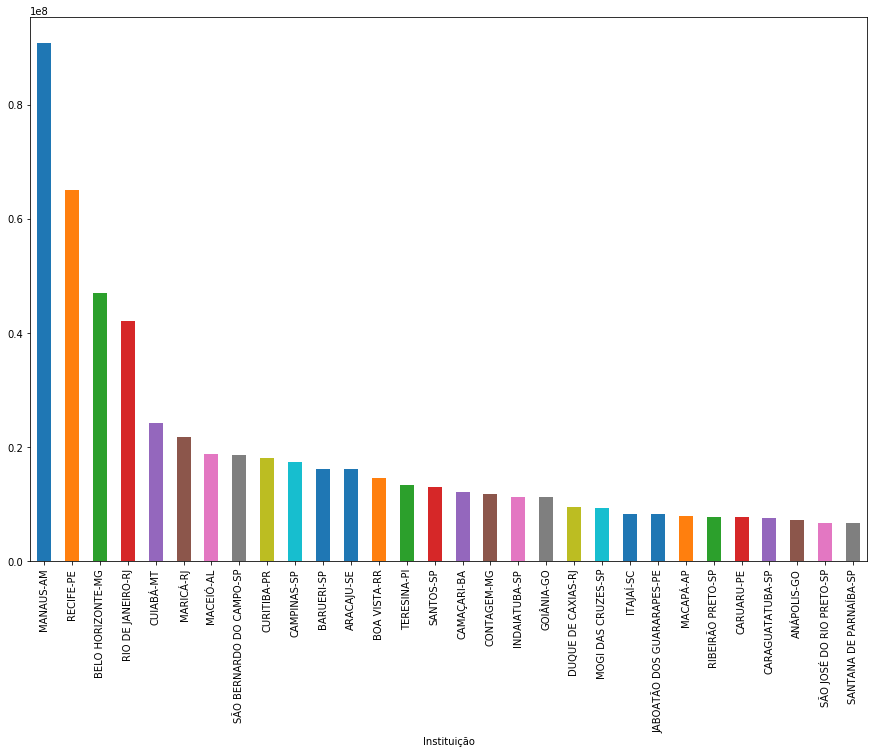

In [387]:
publicidade = df[(df['Conta'] == '04.131 - Comunicação Social') & (df['Coluna'] == 'Despesas Empenhadas')][['Instituição','Valor','População']].sort_values('Valor', ascending=False)
publicidade.set_index('Instituição', inplace=True)
publicidade[:30]['Valor'].plot(kind='bar', figsize=(15,10))

In [375]:
publicidade['pub_percapita'] = publicidade['Valor']/publicidade['População']

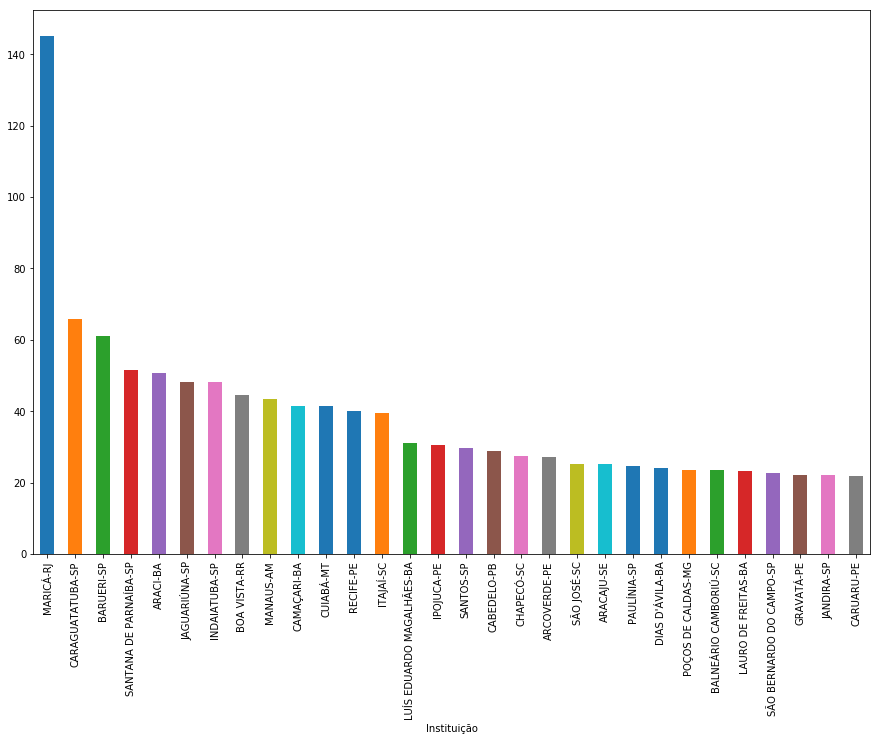

In [384]:
publicidade[publicidade['População'] > 50000].sort_values('pub_percapita', ascending=False)['pub_percapita'][:30].plot(kind='bar', figsize=(15,10))

### TCE MG
source: https://dadosabertos.tce.mg.gov.br/view/xhtml/paginas/downloadArquivos.xhtml#

## TCM BA
source: http://www.tcm.ba.gov.br/portal-da-cidadania/publicidade/

In [10]:
for year in range(2013,2019):
    filename = 'tce_ba_'+str(year)+'.csv'
    if filename not in listdir(download_folder):
        wget.download('https://www.tce.ba.gov.br/images/transparencia/despesa-detalhada/Despesa_detalhada_Exercicio_'+str(year)+'.csv', download_folder + filename)
    print(filename,file_size(download_folder+filename))
    df = pd.read_csv(download_folder+filename, sep=';', encoding = "utf-8")
    display(df.head())
    df.to_pickle(data_folder+'tce_ba_'+str(year)+'.pickle')



tce_ba_2013.csv 1.6 MB


,Unidade Orçamentária,Modalidade de Licitação,Ano do Instrumento,Número do Instrumento,Nome do Credor,CNPJ/CPF do Credor,Número do Empenho,Data do Empenho,Número do Processo do Pagamento,Número do Pagamento Principal,Data do Pagamento Principal,Forma de Pagamento,Regularização,Resto a Pagar,Situação da Liquidação,Mês,Função,Categoria Econômica,Grupo de Despesa,Modalidade de Aplicação,Subelemento de Despesa,Unidade Gestora,Histórico da Liquidação,Secretaria/Órgão,Valor do Empenho,Retenções,Pagamento com Retenções,Pagamento Líquido ao Credor,Unnamed: 28
0,002101 - Diretoria Administrativa e Financeira,09 - Inexigibilidade - art. 60,0,nan,EMPRESA GRAFICA DA BAHIA,15.257.819/0001-06,210100011300007478,18/07/2013,727,210100011300012059,01/08/2013,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,8,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"86 - PUBLICIDADE LEGAL: 2457,00;",0001 - Diretoria Administrativa e Financeira -...,Pagto proc 1030/13,2020 - Comunicação Legal,02 - Tribunal de Contas do Estado,"60.000,00",NaN,"2.457,00","2.457,00"
1,002101 - Diretoria Administrativa e Financeira,07 - Inaplicável,0,nan,Ana Paula Costa Teixeira,943.051.375-34,210100011300008024,31/07/2013,780,210100011300012040,01/08/2013,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,8,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"02 - AUXÍLIO FUNERAL: 2034,00;",0001 - Diretoria Administrativa e Financeira -...,Pagto proc 1029/13,2009 - Encargos com Benefícios Especiais,02 - Tribunal de Contas do Estado,"2.034,00",NaN,"2.034,00","2.034,00"
2,002301 - Centro de Estudos e Desenvolvimento d...,01 - Concorrência Pública,0,nan,AVANSYS TECNOLOGIA LTDA,04.181.950/0001-10,230100011300002453,18/06/2013,5,230100011300007180,01/08/2013,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,8,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"38 - SERV INFO Ñ CARCT SUBST SERVIDOR: 2782,50;",0001 - Centro de Estudos e Desenvolvimento de ...,Prestação de serviços especializados de progra...,7380 - Implementação de Solução Tecnológica de...,02 - Tribunal de Contas do Estado,"35.000,00","IRRF ESTADUAL: 41,74; ISS: 139,13;","2.782,50","2.601,63"
3,002301 - Centro de Estudos e Desenvolvimento d...,01 - Concorrência Pública,0,nan,AVANSYS TECNOLOGIA LTDA,04.181.950/0001-10,230100011300002453,18/06/2013,5,230100011300007210,01/08/2013,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,8,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"38 - SERV INFO Ñ CARCT SUBST SERVIDOR: 795,00;",0001 - Centro de Estudos e Desenvolvimento de ...,Prestação de serviços especializados de progra...,7380 - Implementação de Solução Tecnológica de...,02 - Tribunal de Contas do Estado,"35.000,00","IRRF ESTADUAL: 11,93; ISS: 39,75;","795,00","743,32"
4,002301 - Centro de Estudos e Desenvolvimento d...,01 - Concorrência Pública,0,nan,AVANSYS TECNOLOGIA LTDA,04.181.950/0001-10,230100011300002453,18/06/2013,5,230100011300007245,01/08/2013,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,8,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"38 - SERV INFO Ñ CARCT SUBST SERVIDOR: 6757,50;",0001 - Centro de Estudos e Desenvolvimento de ...,Prestação de serviços especializados de progra...,7380 - Implementação de Solução Tecnológica de...,02 - Tribunal de Contas do Estado,"35.000,00","IRRF ESTADUAL: 101,36; ISS: 337,88;","6.757,50","6.318,26"


tce_ba_2014.csv 1.7 MB


,Unidade Orçamentária,Modalidade de Licitação,Ano do Instrumento,Número do Instrumento,Nome do Credor,CNPJ/CPF do Credor,Número do Empenho,Data do Empenho,Número do Processo do Pagamento,Número do Pagamento Principal,Data do Pagamento Principal,Forma de Pagamento,Regularização,Resto a Pagar,Situação da Liquidação,Mês,Função,Categoria Econômica,Grupo de Despesa,Modalidade de Aplicação,Subelemento de Despesa,Unidade Gestora,Histórico da Liquidação,Secretaria/Órgão,Valor do Empenho,Retenções,Pagamento com Retenções,Pagamento Líquido ao Credor,Unnamed: 28
0,002301 - Centro de Estudos e Desenvolvimento d...,01 - Concorrência Pública,2014,230100011400000384.00,AVANSYS TECNOLOGIA LTDA,04.181.950/0001-10,230100011400001009,03/03/2014,101,230100011400008575,15/09/2014,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,9,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"38 - SERV INFO Ñ CARCT SUBST SERVIDOR: 7137,18;",0001 - Centro de Estudos e Desenvolvimento de ...,Prestação de serviços especializados de progra...,7380 - Implementação de Solução Tecnológica de...,02 - Tribunal de Contas do Estado,"150.000,00","IRRF ESTADUAL: 107,06; ISS: 356,86;","7.137,18","6.673,26"
1,002301 - Centro de Estudos e Desenvolvimento d...,01 - Concorrência Pública,2014,230100011400000384.00,AVANSYS TECNOLOGIA LTDA,04.181.950/0001-10,230100011400001009,03/03/2014,101,230100011400008605,15/09/2014,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,9,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"38 - SERV INFO Ñ CARCT SUBST SERVIDOR: 3436,42;",0001 - Centro de Estudos e Desenvolvimento de ...,Prestação de serviços especializados de progra...,7380 - Implementação de Solução Tecnológica de...,02 - Tribunal de Contas do Estado,"150.000,00","IRRF ESTADUAL: 51,55; ISS: 171,82;","3.436,42","3.213,05"
2,002301 - Centro de Estudos e Desenvolvimento d...,01 - Concorrência Pública,2014,230100011400000384.00,AVANSYS TECNOLOGIA LTDA,04.181.950/0001-10,230100011400001009,03/03/2014,101,230100011400008631,15/09/2014,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,9,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"38 - SERV INFO Ñ CARCT SUBST SERVIDOR: 2960,61;",0001 - Centro de Estudos e Desenvolvimento de ...,Prestação de serviços especializados de progra...,7380 - Implementação de Solução Tecnológica de...,02 - Tribunal de Contas do Estado,"150.000,00","IRRF ESTADUAL: 44,41; ISS: 148,03;","2.960,61","2.768,17"
3,002101 - Diretoria Administrativa e Financeira,11 - Pregão Presencial,0,nan,Turismo Pinheiro LTDA,14.706.238/0001-41,210100011400002761,31/03/2014,55,210100011400015683,15/09/2014,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,9,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"01 - PASSAGENS PAÍS TAX EMB SEGUROS: 907,22;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 9293/14 FAT 204949,"2137 - Auditoria e Fiscalização Contábil, Fina...",02 - Tribunal de Contas do Estado,"50.000,00",NaN,"907,22","907,22"
4,002101 - Diretoria Administrativa e Financeira,07 - Inaplicável,0,nan,Ana Amélia Ferreira,163.257.535-34,210100011400007526,11/09/2014,608,210100011400015594,15/09/2014,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,9,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"88 - ADIANTAMENTO PASSAGENS LOCOMOÇÃO: 4000,00;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 9265/2014 RA 72/2014,"2137 - Auditoria e Fiscalização Contábil, Fina...",02 - Tribunal de Contas do Estado,"4.000,00",NaN,"4.000,00","4.000,00"


tce_ba_2015.csv 1.4 MB


,Unidade Orçamentária,Modalidade de Licitação,Ano do Instrumento,Número do Instrumento,Nome do Credor,CNPJ/CPF do Credor,Número do Empenho,Data do Empenho,Número do Processo do Pagamento,Número do Pagamento Principal,Data do Pagamento Principal,Forma de Pagamento,Regularização,Resto a Pagar,Situação da Liquidação,Mês,Função,Categoria Econômica,Grupo de Despesa,Modalidade de Aplicação,Subelemento de Despesa,Unidade Gestora,Histórico da Liquidação,Secretaria/Órgão,Valor do Empenho,Retenções,Pagamento com Retenções,Pagamento Líquido ao Credor,Unnamed: 28
0,002101 - Diretoria Administrativa e Financeira,07 - Inaplicável,0,nan,Cristina Maria Moura Ferreira,345.775.725-91,210100011500012516,14/10/2015,1,210100011500024000.00,19/10/2015,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,10,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"01 - DIÁRIAS NO PAÍS - PESSOAL CIVIL: 784,70;",0001 - Diretoria Administrativa e Financeira -...,Pgto Proc 9088/2015,6987 - Gestão do Controle Externo das Contas P...,02 - Tribunal de Contas do Estado,"784,70",NaN,"784,70","784,70"
1,002101 - Diretoria Administrativa e Financeira,07 - Inaplicável,0,nan,Ivonete Dionízio De Lima,376.988.695-04,210100011500012591,14/10/2015,190464,210100011500024064.00,19/10/2015,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,10,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"01 - DIÁRIAS NO PAÍS - PESSOAL CIVIL: 1062,00;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 8312/2015,5011 - Capacitação Técnico-profissional do Tri...,02 - Tribunal de Contas do Estado,"1.062,00",NaN,"1.062,00","1.062,00"
2,002101 - Diretoria Administrativa e Financeira,07 - Inaplicável,0,nan,Itiel Souza Santos,181.780.145-72,210100011500012664,15/10/2015,1,210100011500024000.00,19/10/2015,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,10,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"01 - DIÁRIAS NO PAÍS - PESSOAL CIVIL: 756,00;",0001 - Diretoria Administrativa e Financeira -...,Pgto Proc 9126/2015,6987 - Gestão do Controle Externo das Contas P...,02 - Tribunal de Contas do Estado,"756,00",NaN,"756,00","756,00"
3,002101 - Diretoria Administrativa e Financeira,07 - Inaplicável,0,nan,Ivonete Dionízio De Lima,376.988.695-04,210100011500011005,21/09/2015,190464,210100011500024064.00,19/10/2015,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,10,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"01 - DIÁRIAS NO PAÍS - PESSOAL CIVIL: 1593,00;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 8312/2015,5011 - Capacitação Técnico-profissional do Tri...,02 - Tribunal de Contas do Estado,"1.593,00",NaN,"1.593,00","1.593,00"
4,002101 - Diretoria Administrativa e Financeira,11 - Pregão Presencial,0,nan,IMAGEM EQUIPAMENTOS PARA ESCRITORIO LTDA,10.389.877/0001-70,210100011500010238,01/09/2015,680,210100011500023936.00,19/10/2015,01 - Nota de Ordem Bancária (NOB),Não,Não,1 - LIQ Normal,10,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,20 - SERV DIV IMP ENC REP GRÁFICA MICROFIL: 49...,0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 9082/2015 NF 2503,2000 - Manutenção de Serviços Técnico e Admini...,02 - Tribunal de Contas do Estado,"15.000,00","ISS: 248,79;","4.975,84","4.727,05"


tce_ba_2016.csv 1.3 MB


,Unidade Orçamentária,Modalidade de Licitação,Ano do Instrumento,Número do Instrumento,Nome do Credor,CNPJ/CPF do Credor,Número do Empenho,Data do Empenho,Número do Processo do Pagamento,Número do Pagamento Principal,Data do Pagamento Principal,Forma de Pagamento,Regularização,Resto a Pagar,Situação da Liquidação,Mês,Função,Categoria Econômica,Grupo de Despesa,Modalidade de Aplicação,Subelemento de Despesa,Unidade Gestora,Histórico da Liquidação,Secretaria/Órgão,Valor do Empenho,Retenções,Pagamento com Retenções,Pagamento Líquido ao Credor,Unnamed: 28
0,002101 - Diretoria Administrativa,07 - Inaplicável,0,nan,Tribunal de Contas do Estado,14.674.303/0001-02,210100011600000119,04/01/2016,1,210100011600002336.00,29/02/2016,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,2,01 - Legislativa,3 - DESPESA CORRENTE,1 - Pessoal e Encargos Sociais,90 - Aplicações Diretas,"01 - INDENIZ TRABALHISTA SERVIDORES: 1462829,81;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 842/2016,2001 - Administração de Pessoal e Encargos,02 - Tribunal de Contas do Estado,"5.000.000,00",NaN,"1.462.829,81","1.462.829,81"
1,002101 - Diretoria Administrativa,07 - Inaplicável,0,nan,Tribunal de Contas do Estado,14.674.303/0001-02,210100011600000070,04/01/2016,1,210100011600002464.00,29/02/2016,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,2,01 - Legislativa,3 - DESPESA CORRENTE,1 - Pessoal e Encargos Sociais,90 - Aplicações Diretas,"08 - DESP VARIÁV PES CIVIL ESTATUTÁRIO: 9005,27;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 907/2016,2001 - Administração de Pessoal e Encargos,02 - Tribunal de Contas do Estado,"50.000,00",NaN,"9.005,27","9.005,27"
2,002101 - Diretoria Administrativa,07 - Inaplicável,0,nan,Fundo Financeiro da Previdência Social dos Ser...,09.317.177/0001-90,210100011600000038,04/01/2016,1,210100011600002240.00,29/02/2016,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,2,01 - Legislativa,3 - DESPESA CORRENTE,1 - Pessoal e Encargos Sociais,91 - Aplicação Direta Decorrente de Operação e...,"01 - FUNPREV - PESSOAL CIVIL: 1495996,04;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 931/2016 FUNPREV,6986 - Administração de Pessoal e Encargos do ...,02 - Tribunal de Contas do Estado,"10.200.000,00",NaN,"1.495.996,04","1.495.996,04"
3,002101 - Diretoria Administrativa,07 - Inaplicável,0,nan,Fundo Financeiro da Previdência Social dos Ser...,09.317.177/0001-90,210100011600000089,04/01/2016,1,210100011600002240.00,29/02/2016,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,2,01 - Legislativa,3 - DESPESA CORRENTE,1 - Pessoal e Encargos Sociais,91 - Aplicação Direta Decorrente de Operação e...,"01 - FUNPREV - PESSOAL CIVIL: 352957,50;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 931/2016 FUNPREV,2001 - Administração de Pessoal e Encargos,02 - Tribunal de Contas do Estado,"2.280.000,00",NaN,"352.957,50","352.957,50"
4,002101 - Diretoria Administrativa,07 - Inaplicável,0,nan,Tribunal de Contas do Estado,14.674.303/0001-02,210100011600000021,04/01/2016,1,210100011600002464.00,29/02/2016,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,2,01 - Legislativa,3 - DESPESA CORRENTE,1 - Pessoal e Encargos Sociais,90 - Aplicações Diretas,"08 - DESP VARIÁV PES CIVIL ESTATUTÁRIO: 8804,32;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 907/2016,6986 - Administração de Pessoal e Encargos do ...,02 - Tribunal de Contas do Estado,"60.000,00",NaN,"8.804,32","8.804,32"


tce_ba_2017.csv 1.6 MB


,Unidade Orçamentária,Modalidade de Licitação,Ano do Instrumento,Número do Instrumento,Nome do Credor,CNPJ/CPF do Credor,Número do Empenho,Data do Empenho,Número do Processo do Pagamento,Número do Pagamento Principal,Data do Pagamento Principal,Forma de Pagamento,Regularização,Resto a Pagar,Situação da Liquidação,Mês,Função,Categoria Econômica,Grupo de Despesa,Modalidade de Aplicação,Subelemento de Despesa,Unidade Gestora,Histórico da Liquidação,Secretaria/Órgão,Valor do Empenho,Retenções,Pagamento com Retenções,Pagamento Líquido ao Credor,Unnamed: 28
0,002101 - Diretoria Administrativa,11 - Pregão Presencial,2016,210100011600000416.00,TELEMAR NORTE LESTE S/A_( RIO DE JANEIRO ),33.000.118/0001-79,210100011600010191,27/09/2016,2,210100011700000448.00,31/01/2017,01 - Nota de Ordem Bancária (NOB),Sim,Sim,1 - LIQ Normal,1,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"05 - SERV COMUNIC TELECOMUNICAÇÃO: 849,76;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 9255/2016 NF 127100 E 102 TELEMAR,2018 - Encargos com Concessionárias de Serviço...,02 - Tribunal de Contas do Estado,"3.500,00",NaN,"849,76","849,76"
1,002101 - Diretoria Administrativa,09 - Inexigibilidade - art. 60,2016,210100011600004832.00,YANNE CURSOS LTDA,19.033.824/0001-96,210100011600013504,23/11/2016,2,210100011700000480.00,31/01/2017,01 - Nota de Ordem Bancária (NOB),Sim,Sim,1 - LIQ Normal,1,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"11 - APERF TREINAM CAPACIT PESSOAL: 3900,00;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 8396/2016 NF 328 YANNE,5011 - Capacitação Técnico-profissional do Tri...,02 - Tribunal de Contas do Estado,"3.900,00",NaN,"3.900,00","3.900,00"
2,002101 - Diretoria Administrativa,09 - Inexigibilidade - art. 60,2016,210100011600001216.00,SERVICO FEDERAL DE PROCESSAMENTO DE DADOS,33.683.111/0006-03,210100011600002545,01/02/2016,1,210100011700000448.00,31/01/2017,01 - Nota de Ordem Bancária (NOB),Sim,Sim,1 - LIQ Normal,1,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"05 - SERV COMUNIC TELECOMUNICAÇÃO: 500,00;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 9254/2016 NF 1278 SERPRO,2002 - Manutenção de Serviços de Informática,02 - Tribunal de Contas do Estado,"4.800,00","ISS: 25,00;","500,00","475,00"
3,002101 - Diretoria Administrativa,07 - Inaplicável,0,nan,INSTITUTO NACIONAL DO SEGURO SOCIAL,29.979.036/0001-40,210100011700000580,02/01/2017,1,210100011700000416.00,31/01/2017,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,1,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,01 - INSS CONTRIB INDV COOP TRAB E OUTROS: 541...,0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 553/2017,2000 - Manutenção de Serviços Técnico e Admini...,02 - Tribunal de Contas do Estado,"5.000,00",NaN,"541,70","541,70"
4,002101 - Diretoria Administrativa,11 - Pregão Presencial,2016,210100011600000416.00,TELEMAR NORTE LESTE S/A_( RIO DE JANEIRO ),33.000.118/0001-79,210100011600006656,17/06/2016,2,210100011700000512.00,31/01/2017,01 - Nota de Ordem Bancária (NOB),Sim,Sim,1 - LIQ Normal,1,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"05 - SERV COMUNIC TELECOMUNICAÇÃO: 8879,94;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 9260/2016 NF 127099 TELEMAR,2018 - Encargos com Concessionárias de Serviço...,02 - Tribunal de Contas do Estado,"70.000,00",NaN,"8.879,94","8.879,94"


tce_ba_2018.csv 850.6 KB


,Unidade Orçamentária,Modalidade de Licitação,Ano do Instrumento,Número do Instrumento,Nome do Credor,CNPJ/CPF do Credor,Número do Empenho,Data do Empenho,Número do Processo do Pagamento,Número do Pagamento Principal,Data do Pagamento Principal,Forma de Pagamento,Regularização,Resto a Pagar,Situação da Liquidação,Mês,Função,Categoria Econômica,Grupo de Despesa,Modalidade de Aplicação,Subelemento de Despesa,Unidade Gestora,Histórico da Liquidação,Secretaria/Órgão,Valor do Empenho,Retenções,Pagamento com Retenções,Pagamento Líquido ao Credor,Unnamed: 28
0,002101 - Diretoria Administrativa e Financeira,06 - Pregão Eletrônico,2017,210100011700003584.00,POSITIVA EMPREENDIMENTOS E SERVICOS LTDA - ME,17.689.476/0001-84,210100011700015960,28/12/2017,3,210100011800000864.00,31/01/2018,01 - Nota de Ordem Bancária (NOB),Sim,Sim,1 - LIQ Normal,1,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"04 - TERCEIRIZAÇÃO DE MÃO-DE-OBRA: 274,11;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 9585/2017 NF 411 POSITIVA,2000 - Manutenção de Serviços Técnico e Admini...,02 - Tribunal de Contas do Estado,"274,11",PROVISÃO DE ENCARGOS TRABALHISTAS DA LEI ANTIC...,"274,11","238,15"
1,002101 - Diretoria Administrativa e Financeira,07 - Inaplicável,0,nan,Maria Margarida Silva Santos,173.839.785-87,210100011800001183,22/01/2018,3,nan,31/01/2018,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,1,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"15 - Ressarcimento de Despesas: 22,05;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 200/2018 NF 41932,2000 - Manutenção de Serviços Técnico e Admini...,02 - Tribunal de Contas do Estado,"22,05","ISS: 22,05;","22,05","0,00"
2,002101 - Diretoria Administrativa e Financeira,07 - Inaplicável,0,nan,Maria Margarida Silva Santos,173.839.785-87,210100011800000969,22/01/2018,3,210100011800000480.00,31/01/2018,01 - Nota de Ordem Bancária (NOB),Sim,Não,1 - LIQ Normal,1,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"15 - Ressarcimento de Despesas: 418,95;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 200/2018,2000 - Manutenção de Serviços Técnico e Admini...,02 - Tribunal de Contas do Estado,"418,95",NaN,"418,95","418,95"
3,002101 - Diretoria Administrativa e Financeira,06 - Pregão Eletrônico,2017,210100011700004128.00,CEK INFORMÁTICA EIRELI ME,00.949.640/0001-42,210100011700014727,24/11/2017,2,210100011800000896.00,31/01/2018,01 - Nota de Ordem Bancária (NOB),Sim,Sim,1 - LIQ Normal,1,01 - Legislativa,4 - DESPESA DE CAPITAL,4 - Investimentos,90 - Aplicações Diretas,"04 - SISTEMA PROCESSAMENTO DADOS: 29288,00;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 9569/2017 NF 1841,1521 - Ampliação do Parque Computacional de Te...,02 - Tribunal de Contas do Estado,"29.288,00",NaN,"29.288,00","29.288,00"
4,002101 - Diretoria Administrativa e Financeira,06 - Pregão Eletrônico,2017,210100011700000416.00,LINK CARD ADMINISTRADORA DE BENEFÍCIOS EIRELI-ME,12.039.966/0001-11,210100011700002389,16/03/2017,6,210100011800000896.00,31/01/2018,01 - Nota de Ordem Bancária (NOB),Sim,Sim,1 - LIQ Normal,1,01 - Legislativa,3 - DESPESA CORRENTE,3 - Outras Despesas Correntes,90 - Aplicações Diretas,"10 - REPARO ADAPT CONS MAN VEÍCULOS: 1924,07;",0001 - Diretoria Administrativa e Financeira -...,PGTO PROC 170/2018 NF 59786 LINK CARD,2000 - Manutenção de Serviços Técnico e Admini...,02 - Tribunal de Contas do Estado,"71.223,41","ISS: 7,40;","1.924,07","1.916,67"


## TCE SP
source: https://transparencia.tce.sp.gov.br/conjunto-de-dados

In [30]:
for year in range(2013,2019):
    filename = 'tce_sp_'+str(year)+'.zip'
    if filename not in listdir(download_folder):
        wget.download('https://transparencia.tce.sp.gov.br/sites/default/files/conjunto-dados/despesas-'+str(year)+'.zip', download_folder + filename)
    print(filename,file_size(download_folder+filename))
    temp_dir = filename.split('.')[0]
    #unzip_all(download_folder+filename,temp_dir)
    files = [download_folder+temp_dir+'\\'+x for x in listdir(download_folder+temp_dir) if x.split('.')[-1] != 'pdf']
    df = pd.read_csv(files[0], sep=';', encoding = "ISO-8859-1")
    df = df[(df['ds_subfuncao_governo'] == 'COMUNICAÇÃO SOCIAL') & (df['tp_despesa'] == 'Empenhado')]
    df['vl_despesa'] = df['vl_despesa'].str.replace(',','.').astype(float)
    display(df.head())
    df.to_pickle(data_folder+'tce_sp_'+str(year)+'.pickle')
    

tce_sp_2013.zip 1006.8 MB


,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
318248,242087110,2013,Altinópolis,PREFEITURA MUNICIPAL DE ALTINÓPOLIS,1,janeiro,Empenhado,574-2013,CNPJ - PESSOA JURÍDICA - 04333099000102,GOIABA SOM PROPAGANDAS VOLANTES LTDA ME,10/01/2013,440.00,SAÚDE,COMUNICAÇÃO SOCIAL,7004.00,COMUNICACAO E PUBLICIDADE,2252.00,COMUNICACAO E PUBLICIDADE NA AREA DE SAUDE,TESOURO,0310 - SAÚDE - GERAL,DISPENSA DE LICITAÇÃO,33903988 - SERVIÇOS DE PUBLICIDADE E PROPAGANDA,CONTRATACAO DE TRIO ELETRICO/EQUIP. SOM
319923,242086622,2013,Altinópolis,PREFEITURA MUNICIPAL DE ALTINÓPOLIS,1,janeiro,Empenhado,831-2013,CNPJ - PESSOA JURÍDICA - 11355107000179,KIYA & KIYA INFORMATICA LTDA - ME,22/01/2013,77.28,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,9004.00,GESTAO DO PODER EXECUTIVO,2251.00,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,PREGÃO,33903917 - MANUTENÇÃO E CONSERVAÇÃO DE MÁQUINA...,DESPESAS COM RECARGAS TONERS E CARTUCHOS
320106,242088625,2013,Altinópolis,PREFEITURA MUNICIPAL DE ALTINÓPOLIS,1,janeiro,Empenhado,952-2013,CNPJ - PESSOA JURÍDICA - 00402904000143,MARCOS BARROS - LIVRARIA E PESQUISAS - ME,30/01/2013,4790.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004.00,COMUNICACAO E PUBLICIDADE,2251.00,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,DISPENSA DE LICITAÇÃO,33903999 - OUTROS SERVIÇOS DE TERCEIROS - PESS...,CONTRATACAO
321979,242754879,2013,Altinópolis,PREFEITURA MUNICIPAL DE ALTINÓPOLIS,2,fevereiro,Empenhado,2233-2013,CNPJ - PESSOA JURÍDICA - 04333099000102,GOIABA SOM PROPAGANDAS VOLANTES LTDA ME,28/02/2013,800.00,SAÚDE,COMUNICAÇÃO SOCIAL,7004.00,COMUNICACAO E PUBLICIDADE,2252.00,COMUNICACAO E PUBLICIDADE NA AREA DE SAUDE,TESOURO,0310 - SAÚDE - GERAL,DISPENSA DE LICITAÇÃO,33903947 - SERVIÇOS DE COMUNICAÇÃO EM GERAL,DESPESA COM LOCACAO DE CARRO DE SOM
323484,242755442,2013,Altinópolis,PREFEITURA MUNICIPAL DE ALTINÓPOLIS,2,fevereiro,Empenhado,1445-2013,CNPJ - PESSOA JURÍDICA - 02365730000111,KMR TELECOMUNICACOES LTDA,01/02/2013,4451.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004.00,COMUNICACAO E PUBLICIDADE,2251.00,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,DISPENSA DE LICITAÇÃO,33909299 - OUTRAS DESPESAS CORRENTES,SERVICO DE COMUNICACAO EM GERAL


tce_sp_2014.zip 1.2 GB


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_despesa_detalhe,ano_exercicio,ds_municipio,codigo_municipio_ibge,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,tp_identificador_despesa,nr_identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
174233,266390443,2014,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,542-2014,CNPJ - PESSOA JURÍDICA,4384547000199,N.B.B.K. PUBLICIDADE E PROPAGANDA LTDA,16/01/2014,150000.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2303,PUBLICACOES INSTITUCIONAIS,TESOURO,0110 - GERAL,TOMADA DE PREÇOS,33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS,NaN
174359,266391178,2014,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,75-2014,CNPJ - PESSOA JURÍDICA,5133694000159,DANIELLE DE GODOY & FLORENCIO LTDA,03/01/2014,10604.27,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2303,PUBLICACOES INSTITUCIONAIS,TESOURO,0110 - GERAL,TOMADA DE PREÇOS,33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS,REEMPENHO DO EMPENHO 1316/2013 AGENCIA DE PUBL...
174478,266391599,2014,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,236-2014,CNPJ - PESSOA JURÍDICA,4384547000199,N.B.B.K. PUBLICIDADE E PROPAGANDA LTDA,03/01/2014,10000.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,TOMADA DE PREÇOS,33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS,"REEMPENHO DO EMPENHO 4559/2013 PUBLICACOES, PU..."
174601,266392656,2014,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,469-2014,CNPJ - PESSOA JURÍDICA,8227188000117,PATRIA DESIGNERS PUBLIC E PROPAGANDA LTDA.,03/01/2014,6000.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2303,PUBLICACOES INSTITUCIONAIS,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,33903990 - SERVIÇOS DE PUBLICIDADE LEGAL,"PUBLICACAO DE EDITAIS DE CONVITE,PREGAO, TOMA ..."
174809,266393620,2014,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,416-2014,CNPJ - PESSOA JURÍDICA,10867871000160,DIARIO SERV. INTERM. EM PUBLICACOES LTDA EPP,03/01/2014,2970.63,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2303,PUBLICACOES INSTITUCIONAIS,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,33903990 - SERVIÇOS DE PUBLICIDADE LEGAL,"PUBLICACAO DE EDITAL DE REABERTURA DAS TP 05,..."


tce_sp_2015.zip 1.2 GB


,id_despesa_detalhe,ano_exercicio,ds_municipio,codigo_municipio_ibge,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,tp_identificador_despesa,nr_identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
161481,289917656,2015,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,806-2015,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,19/01/2015,6000.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901699 - OUTRAS DESPESAS VARIÁVEIS - PESSOAL...,ESTIMATIVO DE DESPESAS COM PESSOAL
161591,289917979,2015,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,1030-2015,CNPJ - PESSOA JURÍDICA,4384547000199,N.B.B.K. PUBLICIDADE E PROPAGANDA LTDA,23/01/2015,37500.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2303,PUBLICACOES INSTITUCIONAIS,TESOURO,0110 - GERAL,TOMADA DE PREÇOS,33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS,SERVICOS DE COMUNICACAO/PUBLICIDADE E PROPAGAN...
161801,289918672,2015,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,624-2015,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,19/01/2015,155400.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901101 - VENCIMENTOS E SALÁRIOS,ESTIMATIVO DE DESPESAS COM PESSOAL
161989,289919701,2015,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,805-2015,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,19/01/2015,600.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31900501 - SALÁRIO FAMÍLIA - ATIVO - PESSOAL C...,ESTIMATIVO DE DESPESAS COM PESSOAL
162259,289920938,2015,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,760-2015,INSCRIÇÃO GENÉRICA-OUTROS,133,I.N.S.S.,19/01/2015,47000.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901302 - CONTRIBUIÇÕES PREVIDENCIÁRIAS - INSS,ESTIMATIVO DE CONTRIBUICAO


tce_sp_2016.zip 1.2 GB


,id_despesa_detalhe,ano_exercicio,ds_municipio,codigo_municipio_ibge,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,tp_identificador_despesa,nr_identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
158004,320626607,2016,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,1035-2016,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,29/01/2016,127300.08,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901101 - VENCIMENTOS E SALÁRIOS,REFERENTE A FOLHA PAGAMENTO
158011,320626614,2016,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,411-2016,CNPJ - PESSOA JURÍDICA,4384547000199,N.B.B.K. PUBLICIDADE E PROPAGANDA LTDA,04/01/2016,142315.27,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2303,PUBLICACOES INSTITUCIONAIS,TESOURO,0110 - GERAL,TOMADA DE PREÇOS,33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS,CONTRATACAO DE AGENCIA DE PUBLICIDADE REEMPENH...
158075,320627038,2016,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,975-2016,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,29/01/2016,14144.45,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901145 - FÉRIAS - ABONO CONSTITUCIONAL,REFERENTE A FERIAS MENSAIS
158273,320627405,2016,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,412-2016,CNPJ - PESSOA JURÍDICA,4384547000199,N.B.B.K. PUBLICIDADE E PROPAGANDA LTDA,04/01/2016,150000.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2303,PUBLICACOES INSTITUCIONAIS,TESOURO,0110 - GERAL,TOMADA DE PREÇOS,33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS,CONTRATACAO DE AGENCIA DE PUBLICIDADE PLURIANUAL
158278,320627410,2016,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,1012-2016,INSCRIÇÃO GENÉRICA-OUTROS,133,I.N.S.S.,29/01/2016,28464.36,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901302 - CONTRIBUIÇÕES PREVIDENCIÁRIAS - INSS,CONTRIBUICAO MENSAL


tce_sp_2017.zip 1.3 GB


,id_despesa_detalhe,ano_exercicio,ds_municipio,codigo_municipio_ibge,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,tp_identificador_despesa,nr_identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
162529,354250964,2017,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,579-2017,INSCRIÇÃO GENÉRICA-OUTROS,134,F.G.T.S.,31/01/2017,809.46,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901301 - FGTS,CONTRIBUICAO MENSAL - JANEIRO
162531,354250966,2017,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,683-2017,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,31/01/2017,62.14,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31900501 - SALÁRIO FAMÍLIA - ATIVO - PESSOAL C...,FOLHA DE PAGAMENTO REF. MES JANEIRO
162533,354250968,2017,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,685-2017,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,31/01/2017,230.89,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901137 - GRATIFICAÇÃO POR TEMPO DE SERVIÇO,FOLHA DE PAGAMENTO REF. MES JANEIRO
162535,354250970,2017,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,217-2017,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,02/01/2017,156.27,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901101 - VENCIMENTOS E SALÁRIOS,VERBAS RESCISORIAS CARLOS EDUARDO MENDONCA MEL...
162652,354251126,2017,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,686-2017,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,31/01/2017,110.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004,COMUNICACAO E PUBLICIDADE,2251,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901199 - OUTRAS DESPESAS FIXAS - PESSOAL CIVIL,FOLHA DE PAGAMENTO REF. MES JANEIRO


tce_sp_2018.zip 1.9 GB


,id_despesa_detalhe,ano_exercicio,ds_municipio,codigo_municipio_ibge,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,tp_identificador_despesa,nr_identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
172686,386404394,2018,Bariri,3505203,PREFEITURA MUNICIPAL DE BARIRI,1,Janeiro,Empenhado,132-2018,CNPJ - PESSOA JURÍDICA,20491368000107,AZURE PROPAGANDA LTDA EPP,02/01/2018,150000.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,2.00,Supervisao e Coordenacao Superior,2063.00,Publicidade e Propaganda,TESOURO,0110 - GERAL,CONCORRÊNCIA,33903990 - SERVIÇOS DE PUBLICIDADE LEGAL,REFERENTE A PRESTACAO DE SERVICOS PARA PUBLICI...
228866,387320081,2018,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,514-2018,INSCRIÇÃO GENÉRICA-OUTROS,134,F.G.T.S.,30/01/2018,1219.47,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004.00,COMUNICACAO E PUBLICIDADE,2251.00,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901301 - FGTS,CONTRIBUICAO COMPETENCIA JANEIRO 2018
228867,387320082,2018,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,617-2018,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,30/01/2018,63.42,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004.00,COMUNICACAO E PUBLICIDADE,2251.00,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31900501 - SALÁRIO FAMÍLIA - ATIVO - PESSOAL C...,REFERENTE FOLHA DE PAGAMENTO JANEIRO
229011,387320562,2018,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,65-2018,CNPJ - PESSOA JURÍDICA,4384547000199,N.B.B.K. PUBLICIDADE E PROPAGANDA LTDA,02/01/2018,310000.00,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004.00,COMUNICACAO E PUBLICIDADE,2303.00,PUBLICACOES INSTITUCIONAIS,TESOURO,0110 - GERAL,TOMADA DE PREÇOS,33903988 - SERVIÇOS DE PUBLICIDADE E PROPAGANDA,TERMO DE PRORROGACAO CONTRATACAO DE AGENCIA DE...
229012,387320563,2018,Barra Bonita,3505302,PREFEITURA MUNICIPAL DE BARRA BONITA,1,Janeiro,Empenhado,619-2018,INSCRIÇÃO GENÉRICA-OUTROS,33,DIVERSOS SERVIDORES MUNICIPAIS,30/01/2018,230.89,ADMINISTRAÇÃO,COMUNICAÇÃO SOCIAL,7004.00,COMUNICACAO E PUBLICIDADE,2251.00,COORDENACAO E EXECUCAO ACOES DE COMUNICACAO DO...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901137 - GRATIFICAÇÃO POR TEMPO DE SERVIÇO,REFERENTE FOLHA DE PAGAMENTO JANEIRO


## TCE RS
source: http://dados.tce.rs.gov.br/dataset/despesa-orcamentaria-por-empenhos-2018

In [44]:
for year in range(2013,2019):
    filename = 'tce_rs_'+str(year)+'.zip'
    if filename not in listdir(download_folder):
        wget.download('http://dados.tce.rs.gov.br/dados/municipal/empenhos/'+str(year)+'.csv.zip', download_folder + filename)
    print(filename,file_size(download_folder+filename))
    temp_dir = filename.split('.')[0]
    #unzip_all(download_folder+filename,temp_dir)
    files = [download_folder+temp_dir+'\\'+x for x in listdir(download_folder+temp_dir) if x.split('.')[-1] != 'pdf']
    df = pd.read_csv(files[0], sep=',', encoding = "utf-8")
    df.columns = df.columns.str.upper()
    df['DS_SUBFUNCAO'] = df['DS_SUBFUNCAO'].str.upper().str.replace('Ç','C').str.replace('Ã','A')
    df = df[(df['DS_SUBFUNCAO'] == 'COMUNICACAO SOCIAL') & (df['TIPO_OPERACAO'] == 'E')]
    display(df.head())
    df.to_pickle(data_folder+'tce_rs_'+str(year)+'.pickle')

tce_rs_2013.zip 807.8 MB


,ANO_RECEBIMENTO,BIMESTRE_RECEBIMENTO,CD_ORGAO,NOME_ORGAO,CD_RECEBIMENTO,CD_ORGAO_ORCAMENTARIO,NOME_ORGAO_ORCAMENTARIO,CD_UNIDADE_ORCAMENTARIA,NOME_UNIDADE_ORCAMENTARIA,TP_UNIDADE,TIPO_OPERACAO,ANO_EMPENHO,ANO_OPERACAO,DT_EMPENHO,DT_OPERACAO,NR_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_SUBFUNCAO,DS_SUBFUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_PROJETO,NM_PROJETO,CD_ELEMENTO,CD_RUBRICA,DS_RUBRICA,CD_RECURSO,NM_RECURSO,CD_CREDOR,NM_CREDOR,CNPJ_CPF,CGC_TE,HISTORICO,VL_EMPENHO,NR_LIQUIDACAO,VL_LIQUIDACAO,NR_PAGAMENTO,VL_PAGAMENTO
77858,2013,6,40300,PM DE ALECRIM,119000,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2012,2012,2012-11-01,2012-11-01,201200010060,4,ADMINISTRACAO,131.00,COMUNICACAO SOCIAL,6.00,DIVULGACAO OFICIAL E INSTITUCIONAL,2120.00,Manutençao da Assessoria de Imprensa e Divulgaçao,3.3.90.39,339039000000.00,OUTROS SERVICOS DE TERCEIROS-PESSOA JURIDICA,1.00,LIVRE,904.00,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PAGAMENTO DE DIVULGACAO DE NOTICIAS DE IN- TER...,300.00,0.00,nan,0.00,nan
77916,2013,6,40300,PM DE ALECRIM,119000,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2012,2012,2012-11-30,2012-11-30,201200010060,4,ADMINISTRACAO,131.00,COMUNICACAO SOCIAL,6.00,DIVULGACAO OFICIAL E INSTITUCIONAL,2120.00,Manutençao da Assessoria de Imprensa e Divulgaçao,3.3.90.39,339039000000.00,OUTROS SERVICOS DE TERCEIROS-PESSOA JURIDICA,1.00,LIVRE,904.00,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PAGAMENTO DE DIVULGACAO DE NOTICIAS DE IN- TER...,-134.80,0.00,nan,0.00,nan
78040,2013,6,40300,PM DE ALECRIM,119000,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2012,2012,2012-12-03,2012-12-03,201200010920,4,ADMINISTRACAO,131.00,COMUNICACAO SOCIAL,6.00,DIVULGACAO OFICIAL E INSTITUCIONAL,2120.00,Manutençao da Assessoria de Imprensa e Divulgaçao,3.3.90.39,339039000000.00,OUTROS SERVICOS DE TERCEIROS-PESSOA JURIDICA,1.00,LIVRE,904.00,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PAGAMENTO DE DIVULGACAO DE NOTICIAS DE IN- TER...,100.00,0.00,nan,0.00,nan
78211,2013,6,40300,PM DE ALECRIM,119000,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2012,2012,2012-12-17,2012-12-17,201200011326,4,ADMINISTRACAO,131.00,COMUNICACAO SOCIAL,6.00,DIVULGACAO OFICIAL E INSTITUCIONAL,2120.00,Manutençao da Assessoria de Imprensa e Divulgaçao,3.3.90.30,339030000000.00,MATERIAL DE CONSUMO,1.00,LIVRE,122.00,JORGE FELIPETTO,91399410000102.00,nan,PAGAMENTO DE FOTOS DE PROGRAMACOES DE FINAL DE...,600.00,0.00,nan,0.00,nan
78495,2013,6,40300,PM DE ALECRIM,119000,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2012,2012,2012-12-24,2012-12-24,201200011662,4,ADMINISTRACAO,131.00,COMUNICACAO SOCIAL,6.00,DIVULGACAO OFICIAL E INSTITUCIONAL,2120.00,Manutençao da Assessoria de Imprensa e Divulgaçao,3.3.90.39,339039000000.00,OUTROS SERVICOS DE TERCEIROS-PESSOA JURIDICA,1.00,LIVRE,37.00,FUNDACAO NAVEGANTES P.LUCENA,90786765000191.00,979000033.00,"PAGAMENTO DE 15 ANUNCIOS DE DIVULGACAO, PARA A...",150.00,0.00,nan,0.00,nan


tce_rs_2014.zip 853.4 MB


,ANO_RECEBIMENTO,BIMESTRE_RECEBIMENTO,CD_ORGAO,NOME_ORGAO,CD_RECEBIMENTO,CD_ORGAO_ORCAMENTARIO,NOME_ORGAO_ORCAMENTARIO,CD_UNIDADE_ORCAMENTARIA,NOME_UNIDADE_ORCAMENTARIA,TP_UNIDADE,TIPO_OPERACAO,ANO_EMPENHO,ANO_OPERACAO,DT_EMPENHO,DT_OPERACAO,NR_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_SUBFUNCAO,DS_SUBFUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_PROJETO,NM_PROJETO,CD_ELEMENTO,CD_RUBRICA,DS_RUBRICA,CD_RECURSO,NM_RECURSO,CD_CREDOR,NM_CREDOR,CNPJ_CPF,CGC_TE,HISTORICO,VL_EMPENHO,NR_LIQUIDACAO,VL_LIQUIDACAO,NR_PAGAMENTO,VL_PAGAMENTO
83436,2014,6,40300,PM DE ALECRIM,127787,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2013,2013,2013-11-01,2013-11-01,201300010040,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,6,DIVULGACAO OFICIAL E INSTITUCIONAL,2120,Manutençao da Assessoria de Imprensa e Divulgaçao,3.3.90.39,339039000000,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,1.00,LIVRE,904.00,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PAGAMENTO DE DIVULGACAO DE NOTICIAS DE INTERES...,300.00,0.00,nan,0.00,nan
83575,2014,6,40300,PM DE ALECRIM,127787,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2013,2013,2013-12-03,2013-12-03,201300011070,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,6,DIVULGACAO OFICIAL E INSTITUCIONAL,2120,Manutençao da Assessoria de Imprensa e Divulgaçao,3.3.90.39,339039000000,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,1.00,LIVRE,904.00,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PAGAMENTO DE DIVULGACAO E NOTICIAS DE IN TERES...,300.00,0.00,nan,0.00,nan
84101,2014,6,40300,PM DE ALECRIM,127787,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2013,2013,2013-12-30,2013-12-30,201300011958,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,6,DIVULGACAO OFICIAL E INSTITUCIONAL,2120,Manutençao da Assessoria de Imprensa e Divulgaçao,3.3.90.39,339039000000,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,1.00,LIVRE,904.00,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PARA COMPLEMENTO DO EMPENHO NO11070/2013..,222.00,0.00,nan,0.00,nan
84103,2014,6,40300,PM DE ALECRIM,127787,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2013,2013,2013-12-30,2013-12-30,201300011959,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,6,DIVULGACAO OFICIAL E INSTITUCIONAL,2120,Manutençao da Assessoria de Imprensa e Divulgaçao,3.3.90.39,339039000000,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,1.00,LIVRE,904.00,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PARA COMPLEMENTO DO EMPENHO NO10040/2013..,1134.00,0.00,nan,0.00,nan
84359,2014,6,40300,PM DE ALECRIM,127787,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2014,2014,2014-01-03,2014-01-03,201400000139,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgaçao Oficial e Institucional,2191,Manutençao da Assessoria de Imprensa,3.3.90.39,339039920000,SERVICOS DE PUBLICIDADE INSTITUCIONAL,1.00,LIVRE,904.00,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PAGAMENTO DE DIVULGACO DE NOTICIAS DE INTE RES...,300.00,0.00,nan,0.00,nan


tce_rs_2015.zip 842.5 MB


,ANO_RECEBIMENTO,BIMESTRE_RECEBIMENTO,CD_ORGAO,NOME_ORGAO,CD_RECEBIMENTO,CD_ORGAO_ORCAMENTARIO,NOME_ORGAO_ORCAMENTARIO,CD_UNIDADE_ORCAMENTARIA,NOME_UNIDADE_ORCAMENTARIA,TP_UNIDADE,TIPO_OPERACAO,ANO_EMPENHO,ANO_OPERACAO,DT_EMPENHO,DT_OPERACAO,NR_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_SUBFUNCAO,DS_SUBFUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_PROJETO,NM_PROJETO,CD_ELEMENTO,CD_RUBRICA,DS_RUBRICA,CD_RECURSO,NM_RECURSO,CD_CREDOR,NM_CREDOR,CNPJ_CPF,CGC_TE,HISTORICO,VL_EMPENHO,NR_LIQUIDACAO,VL_LIQUIDACAO,NR_PAGAMENTO,VL_PAGAMENTO
81711,2015,6,40300,PM DE ALECRIM,138347,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2014,2014,2014-12-22,2014-12-22,201400011016,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgaçao Oficial e Institucional,2191,Manutençao da Assessoria de Imprensa,3.3.90.30,339030000000,MATERIAL DE CONSUMO,1,LIVRE,2483,CIGI VIDEO PRODUCOES LTDA.,7804762000190.00,nan,AQUISICAO DE 350 CARTOES DE ANIVERSARIO PARA F...,700.00,0.00,nan,0.00,nan
81712,2015,6,40300,PM DE ALECRIM,138347,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2014,2014,2014-12-22,2014-12-22,201400011017,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgaçao Oficial e Institucional,2191,Manutençao da Assessoria de Imprensa,3.3.90.30,339030000000,MATERIAL DE CONSUMO,1,LIVRE,2143,REI ARTES EM METAL LTDA,73484875000180.00,1100056022.00,AQUISICAO DE 01 PLACA DE ALUMINIO 30X40 PA RA ...,650.00,0.00,nan,0.00,nan
82155,2015,6,40300,PM DE ALECRIM,138347,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2014,2014,2014-12-29,2014-12-29,201400011401,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgaçao Oficial e Institucional,2191,Manutençao da Assessoria de Imprensa,3.3.90.39,339039000000,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,1,LIVRE,904,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PARA COMPLEMENTO DO EMPENHO NO10344/2014..,239.70,0.00,nan,0.00,nan
82547,2015,6,40300,PM DE ALECRIM,138347,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2015,2015,2015-01-06,2015-01-06,201500000141,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgaçao Oficial e Institucional,2191,Manutençao da Assessoria de Imprensa,3.3.90.39,339039920000,SERVICOS DE PUBLICIDADE INSTITUCIONAL,1,LIVRE,904,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PAGAMENTO DE DIVULGACAO DE NOTICIAS DE IN TERE...,500.00,0.00,nan,0.00,nan
82664,2015,6,40300,PM DE ALECRIM,138347,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2015,2015,2015-01-07,2015-01-07,201500000168,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgaçao Oficial e Institucional,2191,Manutençao da Assessoria de Imprensa,3.3.90.39,339039470000,SERVICOS DE COMUNICACAO EM GERAL,1,LIVRE,37,FUNDACAO NAVEGANTES P.LUCENA,90786765000191.00,979000033.00,PAGAMENTO DE PRESTADORA DE SERVICOS DE TRANSMI...,7920.00,0.00,nan,0.00,nan


tce_rs_2016.zip 864.9 MB


,ANO_RECEBIMENTO,BIMESTRE_RECEBIMENTO,CD_ORGAO,NOME_ORGAO,CD_RECEBIMENTO,CD_ORGAO_ORCAMENTARIO,NOME_ORGAO_ORCAMENTARIO,CD_UNIDADE_ORCAMENTARIA,NOME_UNIDADE_ORCAMENTARIA,TP_UNIDADE,TIPO_OPERACAO,ANO_EMPENHO,ANO_OPERACAO,DT_EMPENHO,DT_OPERACAO,NR_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_SUBFUNCAO,DS_SUBFUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_PROJETO,NM_PROJETO,CD_ELEMENTO,CD_RUBRICA,DS_RUBRICA,CD_RECURSO,NM_RECURSO,CD_CREDOR,NM_CREDOR,CNPJ_CPF,CGC_TE,HISTORICO,VL_EMPENHO,NR_LIQUIDACAO,VL_LIQUIDACAO,NR_PAGAMENTO,VL_PAGAMENTO
82127,2016,6,40300,PM DE ALECRIM,147453,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2015,2015,2015-10-16,2015-10-16,201500008216,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039000000,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,1,LIVRE,500,RADIO REGIONAL LTDA,89096994000103.00,1169000026.00,PAGAMENTO DE SERVICOS DE DIVULGACAO DA 15A EXP...,1500.00,0.00,nan,0.00,nan
82257,2016,6,40300,PM DE ALECRIM,147453,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2015,2015,2015-12-01,2015-12-01,201500009727,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039000000,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,1,LIVRE,904,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PAGAMENTO DE DIVULGACAO DE NOTICIAS DE INTERES...,900.00,0.00,nan,0.00,nan
82542,2016,6,40300,PM DE ALECRIM,147453,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2015,2015,2015-12-29,2015-12-29,201500010565,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039000000,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,1,LIVRE,904,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PARA COMPLEMENTO DO EMPENHO NO9727/2015...,761.25,0.00,nan,0.00,nan
82748,2016,6,40300,PM DE ALECRIM,147453,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2016,2016,2016-01-04,2016-01-04,201600000094,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039920000,SERVICOS DE PUBLICIDADE INSTITUCIONAL,1,LIVRE,904,EDITORA JORN. CORREIO SEMANAL LTDA,4211446000116.00,1160014725.00,PAGAMENTO DE DIVULGACAO DE NOTICIAS DE INTERES...,900.00,0.00,nan,0.00,nan
84701,2016,6,40300,PM DE ALECRIM,147453,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2016,2016,2016-01-29,2016-01-29,201600000760,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039470000,SERVICOS DE COMUNICACAO EM GERAL,1,LIVRE,37,FUNDACAO NAVEGANTES P.LUCENA,90786765000191.00,979000033.00,PAGAMENTO DE EMPRESA PRESTADORA DE SERVICO DE ...,7920.00,0.00,nan,0.00,nan


tce_rs_2017.zip 863.5 MB


,ANO_RECEBIMENTO,BIMESTRE_RECEBIMENTO,CD_ORGAO,NOME_ORGAO,CD_RECEBIMENTO,CD_ORGAO_ORCAMENTARIO,NOME_ORGAO_ORCAMENTARIO,CD_UNIDADE_ORCAMENTARIA,NOME_UNIDADE_ORCAMENTARIA,TP_UNIDADE,TIPO_OPERACAO,ANO_EMPENHO,ANO_OPERACAO,DT_EMPENHO,DT_OPERACAO,NR_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_SUBFUNCAO,DS_SUBFUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_PROJETO,NM_PROJETO,CD_ELEMENTO,CD_RUBRICA,DS_RUBRICA,CD_RECURSO,NM_RECURSO,CD_CREDOR,NM_CREDOR,CNPJ_CPF,CGC_TE,HISTORICO,VL_EMPENHO,NR_LIQUIDACAO,VL_LIQUIDACAO,NR_PAGAMENTO,VL_PAGAMENTO
83900,2017,6,40300,PM DE ALECRIM,161503,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2016,2016,2016-01-29,2016-01-29,201600000760,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039000000,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,1,LIVRE,37,FUNDACAO NAVEGANTES P.LUCENA,90786765000191.00,979000033.00,PAGAMENTO DE EMPRESA PRESTADORA DE SERVICO DE ...,7920.00,0.00,nan,0.00,nan
84139,2017,6,40300,PM DE ALECRIM,161503,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2016,2016,2016-11-14,2016-11-14,201600009294,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039000000,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,1,LIVRE,254,RBS TV SANTA ROSA LTDA,93088367000190.00,nan,PAGAMENTO DE 26 INSERCOES DE PUBLICIDADE DIVUL...,6214.00,0.00,nan,0.00,nan
84287,2017,6,40300,PM DE ALECRIM,161503,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2016,2016,2016-12-14,2016-12-14,201600010404,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039000000,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,1,LIVRE,3866,ADRIANE MONTANHA 03602918050,20207366000143.00,nan,PAGAMENTO DE 12 HORAS DE DIVULGACAO COM MOTO S...,240.00,0.00,nan,0.00,nan
84613,2017,6,40300,PM DE ALECRIM,161503,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2016,2016,2016-12-30,2016-12-30,201600000760,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039000000,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,1,LIVRE,37,FUNDACAO NAVEGANTES P.LUCENA,90786765000191.00,979000033.00,PAGAMENTO DE EMPRESA PRESTADORA DE SERVICO DE ...,-2400.00,0.00,nan,0.00,nan
84696,2017,6,40300,PM DE ALECRIM,161503,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2017,2017,2017-01-02,2017-01-02,201700000007,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039590000,"SERVICOS DE AUDIO, VIDEO E FOTO",1,LIVRE,122,JORGE FELIPETTO,91399410000102.00,nan,FILMAGEM DA CERIMONIA POSSE DO PREFEITO VICE P...,250.00,0.00,nan,0.00,nan


tce_rs_2018.zip 965.7 MB


,ANO_RECEBIMENTO,MES_RECEBIMENTO,CD_ORGAO,NOME_ORGAO,CD_RECEBIMENTO,CD_ORGAO_ORCAMENTARIO,NOME_ORGAO_ORCAMENTARIO,CD_UNIDADE_ORCAMENTARIA,NOME_UNIDADE_ORCAMENTARIA,TP_UNIDADE,TIPO_OPERACAO,ANO_EMPENHO,ANO_OPERACAO,DT_EMPENHO,DT_OPERACAO,NR_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_SUBFUNCAO,DS_SUBFUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_PROJETO,NM_PROJETO,CD_ELEMENTO,CD_RUBRICA,DS_RUBRICA,CD_RECURSO,NM_RECURSO,CD_CREDOR,NM_CREDOR,CNPJ_CPF,CGC_TE,HISTORICO,VL_EMPENHO,NR_LIQUIDACAO,VL_LIQUIDACAO,NR_PAGAMENTO,VL_PAGAMENTO,ANO_LICITACAO,NR_LICITACAO,MOD_LICITACAO,ANO_CONTRATO,NR_CONTRATO,TP_INSTRUMENTO_CONTRATUAL
89324,2018,12,40300,PM DE ALECRIM,178088,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2017,2017,2017-12-04,2017-12-04,201700010368,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039630000000,SERVICOS GRAFICOS E EDITORIAIS,1,LIVRE,2350,WIELAND SILVA LTDA.,8824791000186.00,1100102474.00,CONFECCAO DE PLACA PREMIO GESTOR PUBLICO E 02 ...,1260.00,0.00,nan,0.00,nan,0,0.00,DPV,nan,nan,NaN
89378,2018,12,40300,PM DE ALECRIM,178088,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2017,2017,2017-12-14,2017-12-14,201700010680,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.3.90.39,339039470000000,SERVICOS DE COMUNICACAO EM GERAL,1,LIVRE,167,EMPRESA JORNALIST.NOROESTE LTDA,87687703000118.00,1109000305.00,PAGAMENTO REFERENTE A MENSAGENS DE NATAL E ANO...,500.00,0.00,nan,0.00,nan,0,0.00,DPV,nan,nan,NaN
89413,2018,12,40300,PM DE ALECRIM,178088,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2017,2017,2017-12-15,2017-12-15,201700010823,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.1.91.13,319113030100000,CONTRIBUICOES PATRONAIS PARA O RPPS - ATIVO CIVIL,1,LIVRE,39,FUNDO FAS,13937121000106.00,nan,PAGAMENTO F.A.P.S SOBRE O 13O SALARIO,280.81,0.00,nan,0.00,nan,0,0.00,DPV,nan,nan,NaN
89438,2018,12,40300,PM DE ALECRIM,178088,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2017,2017,2017-12-15,2017-12-15,201700010848,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.1.91.13,319113990100000,AMORTIZACAO DO PASSIVO ATUARIAL COM O RPPS - A...,1,LIVRE,39,FUNDO FAS,13937121000106.00,nan,PAGAMENTO ALIQUOTA SUPLEMENTAR DOS FAPS CONF. ...,236.72,0.00,nan,0.00,nan,0,0.00,DPV,nan,nan,NaN
89540,2018,12,40300,PM DE ALECRIM,178088,10,SECRETARIA GERAL DE GOVERNO,1,SECRETARIA GERAL DE GOVERNO,PRM,E,2017,2017,2017-12-21,2017-12-21,201700011130,4,ADMINISTRACAO,131,COMUNICACAO SOCIAL,8,Divulgacao Oficial e Institucional,2191,Manutencao da Assessoria de Imprensa,3.1.91.13,319113030100000,CONTRIBUICOES PATRONAIS PARA O RPPS - ATIVO CIVIL,1,LIVRE,39,FUNDO FAS,13937121000106.00,nan,"PAGAMENTO PARTE PATRONAL DO FAPS, CONFORME FOL...",381.22,0.00,nan,0.00,nan,0,0.00,DPV,nan,nan,NaN


## TCE PR
source: http://servicos.tce.pr.gov.br/TCEPR/Tribunal/Relacon/Dados/DadosConsulta/Consolidado

In [22]:
for year in range(2013,2019):
    filename = 'tce_pr_'+str(year)+'.zip'
    if filename not in listdir(download_folder):
        wget.download('http://servicos.tce.pr.gov.br/TCEPR/Tribunal/Relacon/Arquivos/'+str(year)+'_PIT_TodosArquivos.zip', download_folder + filename)
    print(filename,file_size(download_folder+filename))
    despesas = [x for x in unzip_list(download_folder+filename) if x.endswith('Despesa.zip')]
    temp_dir = filename.split('.')[0]+'\\'
    df = pd.DataFrame([])
    for file_zip in despesas:
        try:
            unzip_file(file_zip,download_folder+filename,temp_dir)
            #print('file_zip',file_zip,file_size(download_folder+temp_dir+file_zip))
            empenho = [y for y in unzip_list(download_folder+temp_dir+file_zip) if y.endswith('Empenho.xml')]
            for empenho_file in empenho:
                unzip_file(empenho_file,download_folder+temp_dir+file_zip,temp_dir)
                df2 = read_xml(download_folder+temp_dir+empenho_file)
                df2 = df2[df2['dsDesdobramento'].str.contains('PUBLICIDADE')]
                #print(df.shape,df2.shape)
                df = df.append(df2, sort=False)
        except Exception as e:
            print(file_zip,empenho_file,e)
    df.to_pickle(data_folder+'tce_pr_'+str(year)+'.pickle')
 

tce_pr_2013.zip 1.5 GB
tce_pr_2014.zip 1.6 GB
2014_411090_Despesa.zip 2014_411090_Empenho.xml reference to invalid character number: line 1, column 2677951
2014_411295_Despesa.zip 2014_411295_Empenho.xml reference to invalid character number: line 1, column 547432
2014_411700_Despesa.zip 2014_411700_Empenho.xml reference to invalid character number: line 1, column 556031
tce_pr_2015.zip 1.7 GB
2015_411090_Despesa.zip 2015_411090_Empenho.xml reference to invalid character number: line 1, column 6240005
2015_411700_Despesa.zip 2015_411700_Empenho.xml reference to invalid character number: line 1, column 594934
tce_pr_2016.zip 1.7 GB
tce_pr_2017.zip 1.8 GB
tce_pr_2018.zip 1.0 GB
2018_411700_Despesa.zip 2018_411700_Empenho.xml reference to invalid character number: line 1, column 196260


## TCE ES
source: http://dados.es.gov.br/dataset/despesas-municipios

In [4]:
from bs4 import BeautifulSoup

In [23]:
url = 'http://dados.es.gov.br/dataset/despesas-municipios'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
links = [link['href'] for link in soup.find_all('a') if link['href'].startswith('http://dados.es.gov.br')]
links_dict = dict()
for link in links:
    year = link.split('-')[-1].split('.')[0]
    links_dict[year] = link
print(links_dict)

{'2018': 'http://dados.es.gov.br/dataset/0c7f8c3a-af88-4d03-b906-426474cf8035/resource/97a45d1f-a106-4163-8e6e-5e1c4a5977c6/download/municipios-despesas-2018.zip', '2017': 'http://dados.es.gov.br/dataset/0c7f8c3a-af88-4d03-b906-426474cf8035/resource/335e9ab7-6b62-48bf-a39b-b4cc0a9cc529/download/municipios-despesas-2017.zip', '2016': 'http://dados.es.gov.br/dataset/0c7f8c3a-af88-4d03-b906-426474cf8035/resource/a52bf323-72a2-4f81-b9a1-b821dc6fe8ca/download/municipios-despesas-2016.zip', '2015': 'http://dados.es.gov.br/dataset/0c7f8c3a-af88-4d03-b906-426474cf8035/resource/69a8ad56-7442-4519-a6dc-d1e330edaab2/download/municipios-despesas-2015.zip', '2014': 'http://dados.es.gov.br/dataset/0c7f8c3a-af88-4d03-b906-426474cf8035/resource/8dcef151-4c74-4271-b80e-0b6bf9e9c31d/download/municipios-despesas-2014.zip', '2013': 'http://dados.es.gov.br/dataset/0c7f8c3a-af88-4d03-b906-426474cf8035/resource/032a55f0-fd4e-4ffe-9ab5-b7dfe20024fb/download/municipios-despesas-2013.zip', '2019': 'http://dados

In [51]:
for year in links_dict.keys():
    filename = 'tce_es_'+str(year)+'.zip'
    if filename not in listdir(download_folder):
        print('downloading from: ',filename,links_dict[year])
        wget.download(links_dict[year], download_folder + filename)
    print(filename,file_size(download_folder+filename))
    temp_dir = filename.split('.')[0]+'\\'
    unzip_all(download_folder+filename,temp_dir)
    files = [download_folder+temp_dir+'\\'+x for x in listdir(download_folder+temp_dir)]
    for f in files:
        df = pd.DataFrame([])
        df = pd.read_csv(f, sep=',' ,encoding = 'utf-16',error_bad_lines=False)
        df = df[df['DescricaoSubFuncao'] == "COMUNICAÇÃO SOCIAL"]
        display(df.head())
        df.to_pickle(data_folder+'tce_es_'+str(year)+'.pickle')

tce_es_2018.zip 11.3 MB


,Ano,Mes,UnidadeGestora,EsferaAdministrativa,Empenhada,Liquidada,Paga,CodigoCompleto,CategoriaDespesa,GrupoDespesa,ModalidadeDespesa,ElementoDespesa,CodigoFuncao,DescricaoFuncao,CodigoSubFuncao,DescricaoSubFuncao,PrevisaoInicial
12663,2018,10,Prefeitura Municipal de Águia Branca,Águia Branca,"0,00","2000,00","2000,00",33504300,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,TRANSFERÊNCIAS A INSTITUIÇÕES PRIVADAS SEM FIN...,SUBVENÇÕES SOCIAIS,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
12679,2018,10,Prefeitura Municipal de Águia Branca,Águia Branca,"0,00","0,00","0,00",335043--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,TRANSFERÊNCIAS A INSTITUIÇÕES PRIVADAS SEM FIN...,SUBVENÇÕES SOCIAIS,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
15085,2018,9,Prefeitura Municipal de Águia Branca,Águia Branca,"0,00","0,00","0,00",335043--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,TRANSFERÊNCIAS A INSTITUIÇÕES PRIVADAS SEM FIN...,SUBVENÇÕES SOCIAIS,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
15093,2018,9,Prefeitura Municipal de Águia Branca,Águia Branca,"0,00","2000,00","2000,00",33504300,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,TRANSFERÊNCIAS A INSTITUIÇÕES PRIVADAS SEM FIN...,SUBVENÇÕES SOCIAIS,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
18497,2018,2,Prefeitura Municipal de Águia Branca,Águia Branca,"0,00","0,00","0,00",335043--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,TRANSFERÊNCIAS A INSTITUIÇÕES PRIVADAS SEM FIN...,SUBVENÇÕES SOCIAIS,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"


tce_es_2017.zip 9.7 MB


,Ano,Mes,UnidadeGestora,EsferaAdministrativa,Empenhada,Liquidada,Paga,CodigoCompleto,CategoriaDespesa,GrupoDespesa,ModalidadeDespesa,ElementoDespesa,CodigoFuncao,DescricaoFuncao,CodigoSubFuncao,DescricaoSubFuncao,PrevisaoInicial
33305,2017,8,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",319011--,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,VENCIMENTOS E VANTAGENS FIXAS – PESSOAL CIVIL,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
33306,2017,8,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"8514,33","8514,33","8514,33",31901101,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,VENCIMENTOS E VANTAGENS FIXAS – PESSOAL CIVIL,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
33307,2017,8,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",319013--,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,OBRIGAÇÕES PATRONAIS,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
33308,2017,8,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","694,19","1178,97",31901302,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,OBRIGAÇÕES PATRONAIS,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
33309,2017,8,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",339030--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,MATERIAL DE CONSUMO,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"


tce_es_2016.zip 9.5 MB


,Ano,Mes,UnidadeGestora,EsferaAdministrativa,Empenhada,Liquidada,Paga,CodigoCompleto,CategoriaDespesa,GrupoDespesa,ModalidadeDespesa,ElementoDespesa,CodigoFuncao,DescricaoFuncao,CodigoSubFuncao,DescricaoSubFuncao,PrevisaoInicial
37824,2016,12,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","1701,32","1701,32",33903908,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
37825,2016,12,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","11180,00","11180,00",33903999,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
37826,2016,12,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"917,32","1677,32","1677,32",33903999,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
37827,2016,12,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",339039--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
37828,2016,12,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"2500,00","2500,00","2500,00",33903099,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,MATERIAL DE CONSUMO,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"


tce_es_2015.zip 9.5 MB


,Ano,Mes,UnidadeGestora,EsferaAdministrativa,Empenhada,Liquidada,Paga,CodigoCompleto,CategoriaDespesa,GrupoDespesa,ModalidadeDespesa,ElementoDespesa,CodigoFuncao,DescricaoFuncao,CodigoSubFuncao,DescricaoSubFuncao,PrevisaoInicial
38417,2015,10,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",319013--,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,OBRIGAÇÕES PATRONAIS,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
38418,2015,10,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","1848,43","1848,43",31901302,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,OBRIGAÇÕES PATRONAIS,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
38419,2015,10,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",339036--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA FÍSICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
38420,2015,10,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"10471,65","10471,65","10471,65",31901101,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,VENCIMENTOS E VANTAGENS FIXAS – PESSOAL CIVIL,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
38421,2015,10,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",319011--,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,VENCIMENTOS E VANTAGENS FIXAS – PESSOAL CIVIL,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"


tce_es_2014.zip 8.7 MB


,Ano,Mes,UnidadeGestora,EsferaAdministrativa,Empenhada,Liquidada,Paga,CodigoCompleto,CategoriaDespesa,GrupoDespesa,ModalidadeDespesa,ElementoDespesa,CodigoFuncao,DescricaoFuncao,CodigoSubFuncao,DescricaoSubFuncao,PrevisaoInicial
31259,2014,11,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"-198,49","0,00","579,20",33903607,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA FÍSICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
31260,2014,11,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",339014--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,DIÁRIAS – CIVIL,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
31261,2014,11,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",319011--,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,VENCIMENTOS E VANTAGENS FIXAS – PESSOAL CIVIL,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
31262,2014,9,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","850,66","4950,66",33903999,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
31263,2014,11,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"-913,73","0,00","0,00",33903980,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"


tce_es_2013.zip 7.9 MB


,Ano,Mes,UnidadeGestora,EsferaAdministrativa,Empenhada,Liquidada,Paga,CodigoCompleto,CategoriaDespesa,GrupoDespesa,ModalidadeDespesa,ElementoDespesa,CodigoFuncao,DescricaoFuncao,CodigoSubFuncao,DescricaoSubFuncao,PrevisaoInicial
35839,2013,9,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",339039--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
35840,2013,9,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","1064,00","1064,00",33903999,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
35841,2013,9,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",339036--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA FÍSICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
35842,2013,9,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","542,40","542,40",33903607,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA FÍSICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"
35843,2013,9,Prefeitura Municipal de Alfredo Chaves,Alfredo Chaves,"0,00","0,00","0,00",319011--,DESPESA CORRENTE,PESSOAL E ENCARGOS SOCIAIS,APLICAÇÕES DIRETAS,VENCIMENTOS E VANTAGENS FIXAS – PESSOAL CIVIL,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"0,00"


tce_es_2019.zip 3.2 MB


,Ano,Mes,UnidadeGestora,EsferaAdministrativa,Empenhada,Liquidada,Paga,CodigoCompleto,CategoriaDespesa,GrupoDespesa,ModalidadeDespesa,ElementoDespesa,CodigoFuncao,DescricaoFuncao,CodigoSubFuncao,DescricaoSubFuncao,PrevisaoInicial
9556,2019,1,Prefeitura Municipal de Piúma,Piúma,"0,00","0,00","0,00",339039--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"5000,00"
9633,2019,1,Prefeitura Municipal de Piúma,Piúma,"0,00","0,00","0,00",339039--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"5000,00"
9671,2019,1,Prefeitura Municipal de Piúma,Piúma,"0,00","0,00","0,00",339039--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"10000,00"
10184,2019,1,Prefeitura Municipal de Piúma,Piúma,"0,00","0,00","0,00",339039--,DESPESA CORRENTE,OUTRAS DESPESAS CORRENTES,APLICAÇÕES DIRETAS,OUTROS SERVIÇOS DE TERCEIROS – PESSOA JURÍDICA,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"10000,00"
12911,2019,1,Secretaria Municipal de Administração e Recurs...,Serra,"0,00","0,00","0,00",449052--,DESPESA DE CAPITAL,INVESTIMENTOS,APLICAÇÕES DIRETAS,EQUIPAMENTOS E MATERIAL PERMANENTE,4,ADMINISTRAÇÃO,131,COMUNICAÇÃO SOCIAL,"20000,00"


## TCE PE
source: https://www.tce.pe.gov.br/internet/index.php/dados-abertos/bases-de-dados-completas
https://www.tce.pe.gov.br/internet/index.php/dados-abertos/definicoes-da-api

In [275]:
for year in range(2013,2019):
    url = 'https://sistemas.tce.pe.gov.br/DadosAbertos/Despesas!xml?ANOREFERENCIA='+str(year)+'&SUBFUNCAO=Comunica' 
    filename = 'tce_pe_'+str(year)+'.xml'
    print(filename)
    if filename not in listdir(download_folder):
        wget.download(url,download_folder+filename)
    with open(download_folder+filename, 'rb') as f:
        data = f.read()
        
    soup = BeautifulSoup(data, 'xml').find('conteudo')

    root = et.fromstring(soup.decode())
    dic = dict()
    for count,r in enumerate(root.iter('DespesasMunicipais')):
        dic2 = dict()
        for d in r:
            dic2[d.tag] = d.text
        dic[count] = dic2
    df = pd.DataFrame.from_dict(dic, orient='index')
    display(df.head())
    df.to_pickle(data_folder+'tce_pe_'+str(year)+'.pickle')

tce_pe_2013.xml
-1 / unknown

,HISTORICO,VALORLIQUIDADO,CPF_CNPJ,NOMEUNIDADEGESTORA,VALORPAGO,SUBFUNCAO,UNIDADEORCAMENTARIA,PROGRAMA,ELEMENTODESPESA,ESFERA,FORNECEDOR,ACAO,DATAEMPENHO,ID_UNIDADE_GESTORA,FONTERECURSO,NATUREZA,MODALIDADE,VALOREMPENHADO,FUNCAO,ANOREFERENCIA,TIPOCREDOR,NUMEROEMPENHO,SUBELEMENTODESPESA,CATEGORIA
0,Emissão de Empenho Orçamentário. VALOR QUE SE ...,27381.75,02250442000111,Prefeitura Municipal de Surubim,77870.20,Comunicação Social,ADMINISTRAÇÃO SUPERIOR,DIVULGAÇÃO INSTITUCIONAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MINDELLO E ASSOCIADOS COMUNICAÇÃO LTDA - EPP,"DIVULGAÇÃO INSTITUCIONAL, IMPRESSOS E PUBLICAÇ...",2013-01-25 00:00:00.0,649,None,Outras Despesas Correntes,Aplicações Diretas,78100.00,Administração,2013,2,0000325,SEM SUBELEMENTO,Despesa Corrente
1,Emissão de Empenho Orçamentário. VALOR QUE SE ...,257.50,10921252000107,Prefeitura Municipal de Surubim,257.50,Comunicação Social,ADMINISTRAÇÃO SUPERIOR,DIVULGAÇÃO INSTITUCIONAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,CEPE - COMPANHIA EDITORA DE PERNAMBUCO,"DIVULGAÇÃO INSTITUCIONAL, IMPRESSOS E PUBLICAÇ...",2013-01-02 00:00:00.0,649,None,Outras Despesas Correntes,Aplicações Diretas,257.50,Administração,2013,2,0000001,SEM SUBELEMENTO,Despesa Corrente
2,Emissão de Empenho Orçamentário. VALOR QUE SE ...,412.00,10921252000107,Prefeitura Municipal de Surubim,412.00,Comunicação Social,ADMINISTRAÇÃO SUPERIOR,DIVULGAÇÃO INSTITUCIONAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,CEPE - COMPANHIA EDITORA DE PERNAMBUCO,"DIVULGAÇÃO INSTITUCIONAL, IMPRESSOS E PUBLICAÇ...",2013-01-02 00:00:00.0,649,None,Outras Despesas Correntes,Aplicações Diretas,412.00,Administração,2013,2,0000002,SEM SUBELEMENTO,Despesa Corrente
3,Emissão de Empenho Orçamentário. VALOR QUE SE ...,1390.50,10921252000107,Prefeitura Municipal de Surubim,17921.50,Comunicação Social,ADMINISTRAÇÃO SUPERIOR,DIVULGAÇÃO INSTITUCIONAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,CEPE - COMPANHIA EDITORA DE PERNAMBUCO,"DIVULGAÇÃO INSTITUCIONAL, IMPRESSOS E PUBLICAÇ...",2013-01-02 00:00:00.0,649,None,Outras Despesas Correntes,Aplicações Diretas,40000.00,Administração,2013,2,0000015,SEM SUBELEMENTO,Despesa Corrente
4,Emissão de Empenho Orçamentário. VALOR EMPENHA...,100.00,10994697000117,Prefeitura Municipal de Surubim,100.00,Comunicação Social,ADMINISTRAÇÃO SUPERIOR,DIVULGAÇÃO INSTITUCIONAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,NAE NORDESTE ASSESSORIA EMPRESARIAL LTDA,"DIVULGAÇÃO INSTITUCIONAL, IMPRESSOS E PUBLICAÇ...",2013-05-02 00:00:00.0,649,None,Outras Despesas Correntes,Aplicações Diretas,100.00,Administração,2013,2,0001259,SEM SUBELEMENTO,Despesa Corrente


tce_pe_2014.xml
-1 / unknown

,HISTORICO,VALORLIQUIDADO,CPF_CNPJ,NOMEUNIDADEGESTORA,VALORPAGO,SUBFUNCAO,UNIDADEORCAMENTARIA,PROGRAMA,ELEMENTODESPESA,ESFERA,FORNECEDOR,ACAO,DATAEMPENHO,ID_UNIDADE_GESTORA,FONTERECURSO,NATUREZA,MODALIDADE,VALOREMPENHADO,FUNCAO,ANOREFERENCIA,TIPOCREDOR,NUMEROEMPENHO,SUBELEMENTODESPESA,CATEGORIA
0,REF- LOCA??O DE 02 ( DOIS) CARROS DE SOM COM M...,21560.00,08211304000100,Prefeitura Municipal do Cabo de Santo Agostinho,21560.00,Comunicação Social,31102 - SECRETARIA EXECUTIVA DE COMUNICA??O SO...,GEST?O GOVERNAMENTAL TRANSPARENTE,Outros Serviços de Terceiros ? Pessoa Jurídica,M,BRISA PROMO??ES E EVENTOS LTDA- ME,DIVULGA??O DA A??O GOVERNAMENTAL,2014-07-30 00:00:00.0,115,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,21560.00,Administração,2014,2,0002309,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente
1,REF. LOCA??O DE 02 ( DOIS ) CARROS DE SOM COM ...,21450.00,08211304000100,Prefeitura Municipal do Cabo de Santo Agostinho,21450.00,Comunicação Social,31102 - SECRETARIA EXECUTIVA DE COMUNICA??O SO...,GEST?O GOVERNAMENTAL TRANSPARENTE,Outros Serviços de Terceiros ? Pessoa Jurídica,M,BRISA PROMO??ES E EVENTOS LTDA- ME,DIVULGA??O DA A??O GOVERNAMENTAL,2014-01-02 00:00:00.0,115,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,21450.00,Administração,2014,2,0000169,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente
2,REF. LOCA??O DE 02 (DOIS) CARROS DE SOM COM MO...,21230.00,08211304000100,Prefeitura Municipal do Cabo de Santo Agostinho,21230.00,Comunicação Social,31102 - SECRETARIA EXECUTIVA DE COMUNICA??O SO...,GEST?O GOVERNAMENTAL TRANSPARENTE,Outros Serviços de Terceiros ? Pessoa Jurídica,M,BRISA PROMO??ES E EVENTOS LTDA- ME,DIVULGA??O DA A??O GOVERNAMENTAL,2014-06-11 00:00:00.0,115,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,21230.00,Administração,2014,2,0001811,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente
3,REF. LOCA??O DE 02 (DOIS) CARROS DE SOM COM MO...,21010.00,08211304000100,Prefeitura Municipal do Cabo de Santo Agostinho,21010.00,Comunicação Social,31102 - SECRETARIA EXECUTIVA DE COMUNICA??O SO...,GEST?O GOVERNAMENTAL TRANSPARENTE,Outros Serviços de Terceiros ? Pessoa Jurídica,M,BRISA PROMO??ES E EVENTOS LTDA- ME,DIVULGA??O DA A??O GOVERNAMENTAL,2014-05-12 00:00:00.0,115,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,21010.00,Administração,2014,2,0001432,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente
4,REF. LOCA??O DE 02 (DOIS) CARROS DE SOM COM MO...,18150.00,08211304000100,Prefeitura Municipal do Cabo de Santo Agostinho,18150.00,Comunicação Social,31102 - SECRETARIA EXECUTIVA DE COMUNICA??O SO...,GEST?O GOVERNAMENTAL TRANSPARENTE,Outros Serviços de Terceiros ? Pessoa Jurídica,M,BRISA PROMO??ES E EVENTOS LTDA- ME,DIVULGA??O DA A??O GOVERNAMENTAL,2014-01-24 00:00:00.0,115,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,18150.00,Administração,2014,2,0000469,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente


tce_pe_2015.xml
-1 / unknown

,HISTORICO,VALORLIQUIDADO,CPF_CNPJ,NOMEUNIDADEGESTORA,VALORPAGO,SUBFUNCAO,UNIDADEORCAMENTARIA,PROGRAMA,ELEMENTODESPESA,ESFERA,FORNECEDOR,ACAO,DATAEMPENHO,ID_UNIDADE_GESTORA,FONTERECURSO,NATUREZA,MODALIDADE,VALOREMPENHADO,FUNCAO,ANOREFERENCIA,TIPOCREDOR,NUMEROEMPENHO,SUBELEMENTODESPESA,CATEGORIA
0,REF. A CRIA??O E FINALIZA??O DE SPOTS DE 30 SE...,0.00,24130007000196,Prefeitura Municipal do Cabo de Santo Agostinho,0.00,Comunicação Social,31102 - SECRETARIA EXECUTIVA DE COMUNICA??O SO...,GEST?O GOVERNAMENTAL TRANSPARENTE,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MAKPLAN - MARKETING PLANEJAMENTO LTDA,DIVULGA??O DA A??O GOVERNAMENTAL,2015-03-16 00:00:00.0,115,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,0.00,Administração,2015,2,0000821,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente
1,REF. AO 1? TERMO ADITIVO CONFORME PROCESSO DE ...,1803491.62,24130007000196,Prefeitura Municipal do Cabo de Santo Agostinho,1573661.39,Comunicação Social,31102 - SECRETARIA EXECUTIVA DE COMUNICA??O SO...,GEST?O GOVERNAMENTAL TRANSPARENTE,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MAKPLAN - MARKETING PLANEJAMENTO LTDA,DIVULGA??O DA A??O GOVERNAMENTAL,2015-01-05 00:00:00.0,115,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,1803491.62,Administração,2015,2,0000037,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente
2,REF. CONFEC??O DE 200 ( DUZENTAS ) CAMISAS NO ...,0.00,24130007000196,Prefeitura Municipal do Cabo de Santo Agostinho,0.00,Comunicação Social,31102 - SECRETARIA EXECUTIVA DE COMUNICA??O SO...,GEST?O GOVERNAMENTAL TRANSPARENTE,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MAKPLAN - MARKETING PLANEJAMENTO LTDA,DIVULGA??O DA A??O GOVERNAMENTAL,2015-03-04 00:00:00.0,115,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,0.00,Administração,2015,2,0000711,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente
3,VALOR QUE SE EMPENHA REFERENTE A CONTRATA??O D...,38733.08,02250442000111,Prefeitura Municipal de Surubim,38733.08,Comunicação Social,Administracao Superior,DIVULGA??O INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MINDELLO E ASSOCIADOS COMUNICA??O LTDA - EPP,REALIZA??O DE ATIVIDADES DE DIVULGA??O INSTITU...,2015-08-03 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,38733.08,Administração,2015,2,0001945,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente
4,VALOR QUE SE EMPENHA REFERENTE A CONTRATA??O D...,46303.33,02250442000111,Prefeitura Municipal de Surubim,46303.33,Comunicação Social,Administracao Superior,DIVULGA??O INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MINDELLO E ASSOCIADOS COMUNICA??O LTDA - EPP,REALIZA??O DE ATIVIDADES DE DIVULGA??O INSTITU...,2015-11-10 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,46303.33,Administração,2015,2,0002779,SERVIÇOS DE COMUNICAÇÃO EM GERAL,Despesa Corrente


tce_pe_2016.xml
-1 / unknown

,HISTORICO,VALORLIQUIDADO,CPF_CNPJ,NOMEUNIDADEGESTORA,VALORPAGO,SUBFUNCAO,UNIDADEORCAMENTARIA,PROGRAMA,ELEMENTODESPESA,ESFERA,FORNECEDOR,ACAO,DATAEMPENHO,ID_UNIDADE_GESTORA,FONTERECURSO,NATUREZA,MODALIDADE,VALOREMPENHADO,FUNCAO,ANOREFERENCIA,TIPOCREDOR,NUMEROEMPENHO,SUBELEMENTODESPESA,CATEGORIA
0,VALOR QUE SE EMPENHA E REFERENTE E REFERENTE A...,4440.00,***.***.164-53,Prefeitura Municipal de São Benedito do Sul,3600.00,Comunicação Postais,ADMINISTRA??O DISTRITAL DE IGARAPEBA,GEST?O SUPERIOR DO MUNIC?PIO,Outros Serviços de Terceiros ? Pessoa Física,M,JOAO ANTONIO DA SILVA,Manutencao das Agencias de Correios Comunitari...,2016-01-04 00:00:00.0,587,Transferências de Outros Convênios,Outras Despesas Correntes,Aplicações Diretas,4440.00,Comunicações,2016,1,0000011,SEM SUBELEMENTO,Despesa Corrente
1,VALOR QUE SE EMPENHA REFERENTE A CONTRATA??O D...,49510.44,02250442000111,Prefeitura Municipal de Surubim,49510.44,Comunicação Social,Administracao Superior,DIVULGA??O INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MINDELLO E ASSOCIADOS COMUNICA??O LTDA - EPP,REALIZA??O DE ATIVIDADES DE DIVULGA??O INSTITU...,2016-06-13 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,49510.44,Administração,2016,2,0001924,"OUTROS SERVIÇOS DE TERCEIROS, PESSOA JURÍDICA",Despesa Corrente
2,VALOR QUE SE EMPENHA REFERENTE A CONTRATA??O D...,80000.00,02250442000111,Prefeitura Municipal de Surubim,80000.00,Comunicação Social,Administracao Superior,DIVULGA??O INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MINDELLO E ASSOCIADOS COMUNICA??O LTDA - EPP,REALIZA??O DE ATIVIDADES DE DIVULGA??O INSTITU...,2016-01-04 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,80000.00,Administração,2016,2,0000080,SERVIÇOS DE COMUNICAÇÃO EM GERAL,Despesa Corrente
3,VALOR QUE SE EMPENHA REFERENTE A CONTRATA??O D...,100000.00,02250442000111,Prefeitura Municipal de Surubim,100000.00,Comunicação Social,Administracao Superior,DIVULGA??O INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MINDELLO E ASSOCIADOS COMUNICA??O LTDA - EPP,REALIZA??O DE ATIVIDADES DE DIVULGA??O INSTITU...,2016-03-22 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,100000.00,Administração,2016,2,0000963,SERVIÇOS DE COMUNICAÇÃO EM GERAL,Despesa Corrente
4,VALOR QUE SE EMPENHA REFERENTE A CONTRATA??O D...,150000.00,02250442000111,Prefeitura Municipal de Surubim,150000.00,Comunicação Social,Administracao Superior,DIVULGA??O INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,MINDELLO E ASSOCIADOS COMUNICA??O LTDA - EPP,REALIZA??O DE ATIVIDADES DE DIVULGA??O INSTITU...,2016-05-27 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,150000.00,Administração,2016,2,0001654,SERVIÇOS DE COMUNICAÇÃO EM GERAL,Despesa Corrente


tce_pe_2017.xml
-1 / unknown

,HISTORICO,VALORLIQUIDADO,CPF_CNPJ,NOMEUNIDADEGESTORA,VALORPAGO,SUBFUNCAO,UNIDADEORCAMENTARIA,PROGRAMA,ELEMENTODESPESA,ESFERA,FORNECEDOR,ACAO,DATAEMPENHO,ID_UNIDADE_GESTORA,FONTERECURSO,NATUREZA,MODALIDADE,VALOREMPENHADO,FUNCAO,ANOREFERENCIA,TIPOCREDOR,NUMEROEMPENHO,SUBELEMENTODESPESA,CATEGORIA
0,VALOR QUE SE EMPENHA REFERENTE A PRESTACAO DE ...,3000.00,***.***.834-35,Prefeitura Municipal de Surubim,3000.00,Comunicação Social,ADMINISTRACAO SUPERIOR,DIVULGACAO INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Física,M,LUANA CRISTINA OLIVEIRA DE ASSIS,REALIZACAO DE ATIVIDADES DE DIVULGACAO INSTITU...,2017-03-27 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,3000.00,Administração,2017,1,0000698,SEM SUBELEMENTO,Despesa Corrente
1,VALOR QUE SE EMPENHA REFERENTE A CONTRATACAO D...,90000.00,10229491000109,Prefeitura Municipal de Surubim,90000.00,Comunicação Social,ADMINISTRACAO SUPERIOR,DIVULGACAO INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,USINA DE FILMES LTDA,REALIZACAO DE ATIVIDADES DE DIVULGACAO INSTITU...,2017-05-02 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,90000.00,Administração,2017,2,0000895,SEM SUBELEMENTO,Despesa Corrente
2,VALOR QUE SE EMPENHA REFERENTE A PRESTACAO DE ...,7800.00,11364583000156,Prefeitura Municipal de Surubim,7800.00,Comunicação Social,ADMINISTRACAO SUPERIOR,DIVULGACAO INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,HELIO BONFIM PEREIRA ME,REALIZACAO DE ATIVIDADES DE DIVULGACAO INSTITU...,2017-02-09 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,7800.00,Administração,2017,2,0000290,SEM SUBELEMENTO,Despesa Corrente
3,VALOR QUE SE EMPENHA REFERENTE AO DESENVOLVIME...,7500.00,11364583000156,Prefeitura Municipal de Surubim,7500.00,Comunicação Social,ADMINISTRACAO SUPERIOR,DIVULGACAO INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,HELIO BONFIM PEREIRA ME,REALIZACAO DE ATIVIDADES DE DIVULGACAO INSTITU...,2017-06-01 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,7500.00,Administração,2017,2,0001199,SEM SUBELEMENTO,Despesa Corrente
4,VALOR QUE SE EMPENHA REFERENTE A CONTRATACAO D...,7500.00,17780647000186,Prefeitura Municipal de Surubim,7500.00,Comunicação Social,ADMINISTRACAO SUPERIOR,DIVULGACAO INSTITUCIONAL E CERIMONIAL,Outros Serviços de Terceiros ? Pessoa Jurídica,M,EDMILSON JOSE DE LIMA,REALIZACAO DE ATIVIDADES DE DIVULGACAO INSTITU...,2017-05-05 00:00:00.0,649,Recursos Ordinários (Não vinculados),Outras Despesas Correntes,Aplicações Diretas,7500.00,Administração,2017,2,0000973,SEM SUBELEMENTO,Despesa Corrente


tce_pe_2018.xml
-1 / unknown

,HISTORICO,VALORLIQUIDADO,CPF_CNPJ,NOMEUNIDADEGESTORA,VALORPAGO,SUBFUNCAO,UNIDADEORCAMENTARIA,PROGRAMA,ELEMENTODESPESA,ESFERA,FORNECEDOR,ACAO,DATAEMPENHO,ID_UNIDADE_GESTORA,FONTERECURSO,NATUREZA,MODALIDADE,VALOREMPENHADO,FUNCAO,ANOREFERENCIA,TIPOCREDOR,NUMEROEMPENHO,SUBELEMENTODESPESA,CATEGORIA
0,VALOR REF. A PRESTACAO DE SERVICOS DE RADIODIF...,5850.00,09025560000175,Prefeitura Municipal de Lagoa dos Gatos,5850.00,Comunicação Social,ASSESSORIA DE COMUNICACAO E ARTICULACAO POLITICA,DIVULGACAO INSTITUCIONAL DA ADMINISTRACAO,Outros Serviços de Terceiros ? Pessoa Jurídica,M,FM RADIO A VOZ DO AGRESTE LTDA ME,"DIVULGACAO INSTITUCIONAL, IMPRESSOS E PUBLICAC...",2018-03-02 00:00:00.0,354,Recursos Ordinários,Outras Despesas Correntes,Aplicações Diretas,5850.00,Administração,2018,2,0000177,SEM SUBELEMENTO,Despesa Corrente
1,"VALOR QUE SE EMPENHA EM FAVOR DO CREDOR, REFER...",300000.00,17670503000177,Prefeitura Municipal de Petrolina,300000.00,Comunicação Social,ASSESSORIA DE GOVERNO,PROMO??O E DIVULGA??O DAS A??ES DO GOVERNO MUN...,Outros Serviços de Terceiros ? Pessoa Jurídica,M,SALA 10 COMUNICA??O LTDA,DIVULGA??O DAS ATIVIDADES DA PREFEITURA JUNTO ...,2018-09-25 00:00:00.0,471,Recursos Ordinários,Outras Despesas Correntes,Aplicações Diretas,300000.00,Comunicações,2018,2,0003817,SERVIÇOS DE PUBLICIDADE E PROPAGANDA,Despesa Corrente
2,"VALOR QUE SE EMPENHA EM FAVOR DO CREDOR, REFER...",699782.31,17670503000177,Prefeitura Municipal de Petrolina,699782.31,Comunicação Social,ASSESSORIA DE GOVERNO,PROMO??O E DIVULGA??O DAS A??ES DO GOVERNO MUN...,Outros Serviços de Terceiros ? Pessoa Jurídica,M,SALA 10 COMUNICA??O LTDA,DIVULGA??O DAS ATIVIDADES DA PREFEITURA JUNTO ...,2018-08-22 00:00:00.0,471,Recursos Ordinários,Outras Despesas Correntes,Aplicações Diretas,699782.31,Comunicações,2018,2,0003303,SERVIÇOS DE PUBLICIDADE E PROPAGANDA,Despesa Corrente
3,"VALOR QUE SE EMPENHA EM FAVOR DO CREDOR, REFER...",1249845.04,17670503000177,Prefeitura Municipal de Petrolina,1249845.04,Comunicação Social,ASSESSORIA DE GOVERNO,PROMO??O E DIVULGA??O DAS A??ES DO GOVERNO MUN...,Outros Serviços de Terceiros ? Pessoa Jurídica,M,SALA 10 COMUNICA??O LTDA,DIVULGA??O DAS ATIVIDADES DA PREFEITURA JUNTO ...,2018-06-08 00:00:00.0,471,Recursos Ordinários,Outras Despesas Correntes,Aplicações Diretas,1249845.04,Comunicações,2018,2,0002300,SERVIÇOS DE PUBLICIDADE E PROPAGANDA,Despesa Corrente
4,"VALOR QUE SE EMPENHA EM FAVOR DO CREDOR, REFER...",0.00,17670503000177,Prefeitura Municipal de Petrolina,0.00,Comunicação Social,ASSESSORIA DE GOVERNO,PROMO??O E DIVULGA??O DAS A??ES DO GOVERNO MUN...,Outros Serviços de Terceiros ? Pessoa Jurídica,M,SALA 10 COMUNICA??O LTDA,DIVULGA??O DAS ATIVIDADES DA PREFEITURA JUNTO ...,2018-05-14 00:00:00.0,471,Recursos Ordinários,Outras Despesas Correntes,Aplicações Diretas,0.00,Comunicações,2018,2,0001937,SERVIÇOS DE PUBLICIDADE E PROPAGANDA,Despesa Corrente


## TCE TO
source: https://www.tce.to.gov.br/sitetce/sessoes/resultados-de-consultas

## TCE RR
source: https://www.tce.rr.leg.br/portal/cidadao.php

## TCM GO
source: https://www.tcm.go.gov.br/pentaho/api/repos/%3Apublic%3ATCM%3ADashBoards%3APortalCidadao%3ADespesas.wcdf/generatedContent?=undefined&bookmarkState=%7B%22impl%22%3A%22client%22%2C%22params%22%3A%7B%22paramAno%22%3A%222019%22%2C%22paramMunicipio%22%3A%22Itabera%C3%AD%22%7D%7D

## TCE CE
source:
https://www.tce.ce.gov.br/despesas/execucao-orcamentaria ,
http://municipios.tce.ce.gov.br/tce-municipios/ ,
http://api.tce.ce.gov.br/

## TCM PA
source:
https://www.tcm.pa.gov.br/ ,
https://www.tcm.pa.gov.br/portal-da-transparencia/tcm-pa-transparente/despesas/01/2013#portipo